In [2]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [3]:
# Import Python Libraries
import numpy as np
import glob
import os,sys
import iris
import iris.plot as iplt
from iris.analysis import MEAN, MAX, SUM
import logging 
from netCDF4 import Dataset
acpc_workspace='/gws/nopw/j04/acpc'
#sys.path.append(os.path.join(acpc_workspace,'houston_deep_convection/Intercomparison/acpc_intercomparison'))
sys.path.append('/home/users/pmarinescu/acpc_intercomparison_3')
sys.path.append('/home/users/pmarinescu')
from acpc_intercomparison_3 import load_variable_cube,color,variable_names,directory,filename
import copy

import matplotlib
matplotlib.pyplot.switch_backend('agg')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
%matplotlib inline

#from Setup_intercomparison import load_variable_cube,color,variable_names,directory,filename
from collections import  OrderedDict

import warnings
warnings.filterwarnings('ignore', category=UserWarning, append=True)
warnings.filterwarnings('ignore', category=RuntimeWarning, append=True)
warnings.filterwarnings('ignore', category=FutureWarning, append=True)

OrderedDict([('WRF_OXF', OrderedDict([('AccumPrecip', 'RAINNC'), ('OLR', 'OLR'), ('W', 'W'), ('T', 'air_temperature'), ('P', 'air_pressure'), ('rho', 'RHO'), ('U', 'U'), ('V', 'V'), ('QV', 'QVAPOR'), ('LH', 'LHRTOT'), ('QCLD', 'QCLOUD'), ('QRAIN', 'QRAIN'), ('QICE', 'QICE'), ('QSNOW', 'QSNOW'), ('QGRA', 'QGRAUP'), ('NCLD', 'QNCLOUD'), ('NRAIN', 'QNRAIN'), ('NICE', 'QNICE'), ('NSNOW', 'QNSNOW'), ('NGRA', 'QNGRAUPEL'), ('NAERO', 'NAER1'), ('QCOND', 'PCC'), ('QDEP', ''), ('QCNUC', ''), ('QINUC', 'MNUCCD'), ('liquid_hydrometeors', ['QCLOUD', 'QRAIN']), ('ice_hydrometeors', ['QICE', 'QSNOW', 'QGRAUP']), ('hydrometeors', ['QCLOUD', 'QRAIN', 'QICE', 'QSNOW', 'QGRAUP'])])), ('WRF_NASA', OrderedDict([('AccumPrecip', 'RAINNC'), ('OLR', 'TLWUP'), ('W', 'W'), ('T', 'air_temperature'), ('P', 'air_pressure'), ('rho', 'RHO'), ('U', 'U'), ('V', 'V'), ('QV', 'QVAPOR'), ('LH', 'LATHEAT'), ('QCLD', 'QCLOUD'), ('QRAIN', 'QRAIN'), ('QICE', 'QICE'), ('QSNOW', 'QSNOW'), ('QGRA', 'QGRAUP'), ('NCLD', 'QNCLOUD'

In [4]:
#from Setup_intercomparison import load_variable_cube,color,variable_names,directory,filename

In [5]:
########################
savedir=os.path.join(acpc_workspace,'public/pmarin','BAMS','Figs_2024')
os.makedirs(savedir,exist_ok=True)

In [6]:
print(savedir)

/gws/nopw/j04/acpc/public/pmarin/BAMS/Figs_2024


In [7]:
#Set filename to StageIV Data
filename_st4 = '/gws/nopw/j04/acpc/houston_deep_convection/Stage4/Stage4.nc'

In [8]:
# Create Blank Dictionary Items to Store Filenamesd
data = Dataset(filename_st4)

In [9]:
print(data)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: CF-1.5
    dimensions(sizes): x(77), y(76), time(24)
    variables(dimensions): float64 precipitation(x,y,time), int64 x(x), int64 y(y), float64 time(time), float32 latitude(x,y), float32 longitude(x,y)
    groups: 



In [10]:
precip_hr = data.variables['precipitation'][:]
precip_cum = np.nancumsum(precip_hr,axis=2)
lat_st4 = data.variables['latitude'][:]
lon_st4 = data.variables['longitude'][:]
time_st4 = data.variables['time'][:]

In [11]:
print(time_st4)
print(np.shape(lat_st4))

[15875.5        15875.54166667 15875.58333333 15875.625
 15875.66666667 15875.70833333 15875.75       15875.79166667
 15875.83333333 15875.875      15875.91666667 15875.95833333
 15876.         15876.04166667 15876.08333333 15876.125
 15876.16666667 15876.20833333 15876.25       15876.29166667
 15876.33333333 15876.375      15876.41666667 15876.45833333]
(77, 76)


In [12]:
#np.min(lon)

In [13]:
########### MODEL STUFFF
models=[]
models.append('RAMS_CSU')
models.append('COSMO_KIT')
models.append('UM_LEEDS')
models.append('WRF_NASA')
models.append('MesoNH_Toulouse')
models.append('WRF_OXF')
models.append('WRF_PNNL')


In [14]:
#plotdir=os.path.join(acpc_workspace,'public/acpc/pmarin','Plots_Apr2020')
#os.makedirs(plotdir,exist_ok=True)

#savedir=os.path.join(acpc_workspace,'houston_deep_convection/Processing','Apr_2020BC')
#os.makedirs(savedir,exist_ok=True)


In [15]:
#Set models and cases to process:

models=[]
models.append('COSMO_KIT')
models.append('ICON')
models.append('MesoNH_Toulouse')
models.append('RAMS_CSU')
models.append('UM_LEEDS')
models.append('WRF_NASA')
models.append('WRF_OXF')
models.append('WRF_PNNL')

modelnames=[]
modelnames.append('COSMO')
modelnames.append('ICON')
modelnames.append('MesoNH')
modelnames.append('RAMS')
modelnames.append('UM')
modelnames.append('NU-WRF')
modelnames.append('WRF-Morr')
modelnames.append('WRF-SBM')

modelnames2=[]
modelnames2.append('COSMO')
modelnames2.append('ICON')
modelnames2.append('Meso\nNH')
modelnames2.append('RAMS')
modelnames2.append('UM')
modelnames2.append('NU\nWRF')
modelnames2.append('WRF\nMorr')
modelnames2.append('WRF\nSBM')

logging.info(f'Running script for models {models}')

cases=[]
cases.append('CLN')
cases.append('POL')

casenames=[]
casenames.append('Low-Aero')
casenames.append('High-Aero')

ls = OrderedDict()
ls['CLN'] = '--'
ls['POL'] = '-'



logging.info(f'Running script for cases {cases}')

ylbl_txt = 'Domain Mean \n Accumulated Precip.'

#### SET DATE SPECIFICS
#import matplotlib.dates as mdates
#dateFmt = mdates.DateFormatter('%HH')
#dateB = datetime.datetime(2013,6,19,16)
#dateE = datetime.datetime(2013,6,20,4)3
#time_range=[dateB,dateE]
#constraint_time=iris.Constraint(time = lambda cell: time_range[0]<= cell <=  time_range[1])

#constraint_lat=iris.Constraint(latitude = lambda cell: time_range[0]<= cell <=  time_range[1])
#constraint_lon=iris.Constraint(time = lambda cell: time_range[0]<= cell <=  time_range[1])


In [16]:
# Create Blank Dictionary Items to Store Filenames
files=OrderedDict()
dx='500m'
dt='5m'
files['CLN']=OrderedDict()
files['CLN'][dx]=OrderedDict()
files['CLN'][dx][dt]=OrderedDict()
files['POL']=OrderedDict()
files['POL'][dx]=OrderedDict()
files['POL'][dx][dt]=OrderedDict()

for model in models:
    for case in cases:

        if model == 'ICON':
            continue
        print(directory[case][dx][dt][model])
        files[case][dx][dt][model]=glob.glob(os.path.join(directory[case][dx][dt][model],filename[dx][dt][model]))
        files[case][dx][dt][model]=sorted(files[case][dx][dt][model])

logging.info(f'filenames set up for all models and cases')

/gws/nopw/j04/acpc/houston_deep_convection/COSMO_KIT/1mode/CLN/500m
/gws/nopw/j04/acpc/houston_deep_convection/COSMO_KIT/1mode/POL/500m
/gws/nopw/j04/acpc/houston_deep_convection/MesoNH_Toulouse/1mode/CLN/5min/500m/
/gws/nopw/j04/acpc/houston_deep_convection/MesoNH_Toulouse/1mode/POL/5min/500m/
/gws/nopw/j04/acpc/houston_deep_convection/RAMS_CSU/1mode/CLN/5min/g3
/gws/nopw/j04/acpc/houston_deep_convection/RAMS_CSU/1mode/POL/5min/g3
/gws/nopw/j04/acpc/houston_deep_convection/UM_Leeds/1mode/CLN/0p5km_5m
/gws/nopw/j04/acpc/houston_deep_convection/UM_Leeds/1mode/POL/0p5km_5m
/gws/nopw/j04/acpc/houston_deep_convection/WRF_GISS/1mode/CLN/5min/d03
/gws/nopw/j04/acpc/houston_deep_convection/WRF_GISS/1mode/POL/5min/d03
/gws/nopw/j04/acpc/houston_deep_convection/WRF_Oxford/1mode/CLN/5min/d03
/gws/nopw/j04/acpc/houston_deep_convection/WRF_Oxford/1mode/POL/5min/d03
/gws/nopw/j04/acpc/houston_deep_convection/WRF_PNNL/1mode/CLN/5min/d03
/gws/nopw/j04/acpc/houston_deep_convection/WRF_PNNL/1mode/POL/5

In [17]:
#########################################################
# Load and plot data 2D Data
#########################################################
varname = 'AccumPrecip'
savedir_i=os.path.join(savedir,varname)
print(savedir_i)
#var_plot={}
#for model in models:
#    for case in cases:
#        print(model,case)
#        var_plot[model,case]=load_variable_cube[model](files[case][dx][dt][model],variable_names[model][varname])

/gws/nopw/j04/acpc/public/pmarin/BAMS/Figs_2024/AccumPrecip


In [18]:
# Screen Stage IV data for lat lon 
import copy
precip_cum_scr_st4 = copy.deepcopy(precip_cum)
lat_bnd = [28.5, 30.5]
lon_bnd = [-93.8, -96.4]

lat_bnd = [28.48, 30.48]
lon_bnd = [-94, -96]

lat_bnd = [28.39, 30.46]
lon_bnd = [-93.93, -96.33]

for i in np.arange(0,24):    
    precip_cum_scr_s = copy.deepcopy(precip_cum_scr_st4[:,:,i])
    precip_cum_scr_s[lat_st4 > lat_bnd[1]] = np.nan
    precip_cum_scr_s[lat_st4 < lat_bnd[0]] = np.nan
    precip_cum_scr_s[lon_st4 > lon_bnd[0]] = np.nan
    precip_cum_scr_s[lon_st4 < lon_bnd[1]] = np.nan
    precip_cum_scr_st4[:,:,i] = copy.deepcopy(precip_cum_scr_s)    

precip_cum_time_st4 = np.nansum(np.nansum(precip_cum,axis=1),axis=0)
precip_cum_time_scr_st4 = np.nansum(np.nansum(precip_cum_scr_st4,axis=1),axis=0)


In [19]:
#print(np.shape(var_plot))
variable_names['UM_LEEDS']['AccumPrecip']

'AccumPrecip'

In [49]:

vname = 'AccumPrecip'
precip_cum_scr_mod = {}
precip_cum_time_scr_mod = {}
precip_cum_scr_modi = {}
precip_cum_time_scr_modi = {}
mod_lat = {}
mod_lon = {}
#model = 'RAMS_CSU'
#case = 'POL' 
for model in models:
    for case in cases:    
        for t in np.arange(0,143,1):
            print(model,case,t)
            if model == 'UM_LEEDS':
                print(files[case][dx][dt][model][t])
                var_plot=load_variable_cube[model](files[case][dx][dt][model][:],variable_names[model][vname]) # Define Variable Name Here       
                var_plot = var_plot[t,:,:]
                lat_m = var_plot.coord('latitude').points
                lon_m = var_plot.coord('longitude').points
                var_plot = var_plot.data
            elif model == 'MesoNH_Toulouse':
                print(files[case][dx][dt][model][t])
                var_plot=load_variable_cube[model](files[case][dx][dt][model][t:t+1],variable_names[model][vname]) # Define Variable Name Here       
                var_plot = var_plot[0,:,:]
                lat_m = var_plot.coord('latitude').points
                lon_m = var_plot.coord('longitude').points
                var_plot = var_plot.data
            elif model == 'ICON':
                timen ='' # 5 min data
                ipath = '/gws/nopw/j04/acpc/houston_deep_convection/ICON/'+case+'/'
                ifile = 'pcp_accum_ICON_'+case+'_500m_20130619T12-20T15'+timen+'.nc'
                dnow = Dataset(ipath+ifile, 'r')
                var_plot = dnow['pcp_accum'][t+48,:,:] - dnow['pcp_accum'][48,:,:]
                lon = dnow['lon']
                lat = dnow['lat']
                lon_m, lat_m = np.meshgrid(lon,lat)
               
            else:
                print(files[case][dx][dt][model][t])
                var_plot =load_variable_cube[model](files[case][dx][dt][model][t],variable_names[model][vname]) # Define Variable Name Here       
                #precip_cum_scr_m = copy.deepcopy(var_plot.data)
                lat_m = var_plot.coord('latitude').points
                lon_m = var_plot.coord('longitude').points
                var_plot = var_plot.data

            if len(np.shape(var_plot)) == 3:
                var_plot = var_plot[0,:,:]
            
            if t == 0:
                shape = np.hstack((np.shape(var_plot),145))
                pcp_scr = np.zeros(shape)
                pcp_scri = np.zeros((77,76,145))
                        
            if model == 'MesoNH_Toulouse':
                lon_m = lon_m - 360
            
            mod_lat[model,case] = lat_m
            mod_lon[model,case] = lon_m
            precip_cum_scr_m = copy.deepcopy(var_plot)
            precip_cum_scr_m[lat_m > lat_bnd[1]] = np.nan
            precip_cum_scr_m[lat_m < lat_bnd[0]] = np.nan
            precip_cum_scr_m[lon_m > lon_bnd[0]] = np.nan
            precip_cum_scr_m[lon_m < lon_bnd[1]] = np.nan
            pcp_scr[:,:,t] = precip_cum_scr_m

            from scipy import interpolate
            precip_cum_scr_mi = interpolate.griddata((lon_m.ravel(),lat_m.ravel()),var_plot.ravel(),(lon_st4,lat_st4))
            #f = interpolate.interp2d(lon_m,lat_m,var_plot.data)            
            #precip_cum_scr_mi = f(lon_st4,lat_st4)
            precip_cum_scr_mi[lat_st4 > lat_bnd[1]] = np.nan
            precip_cum_scr_mi[lat_st4 < lat_bnd[0]] = np.nan
            precip_cum_scr_mi[lon_st4 > lon_bnd[0]] = np.nan
            precip_cum_scr_mi[lon_st4 < lon_bnd[1]] = np.nan
            pcp_scri[:,:,t] = precip_cum_scr_mi
            
            
        precip_cum_scr_mod[model,case] = copy.deepcopy(pcp_scr)            
        precip_cum_time_scr_mod[model,case] = np.nansum(np.nansum(pcp_scr,axis=1),axis=0)
        precip_cum_scr_modi[model,case] = copy.deepcopy(pcp_scri)            
        precip_cum_time_scr_modi[model,case] = np.nansum(np.nansum(pcp_scri,axis=1),axis=0)
        


#print(precip_cum_time_st4)
#print(precip_cum_time_scr_st4)
#print(precip_cum_time_scr_mod[model,case])

COSMO_KIT CLN 0
/gws/nopw/j04/acpc/houston_deep_convection/COSMO_KIT/1mode/CLN/500m/lfff00040000.nc_5min


KeyboardInterrupt: 

In [20]:
#precip_cumsum_time_scr_mod = {} 
#for model in models:
#    for case in cases:    
mod_dates = []
for j in np.arange(0,145):
    cur_date = datetime.datetime(2013,6,19,16) + datetime.timedelta(minutes=int(j*5))
    #print(cur_date)
    mod_dates = np.append(mod_dates,cur_date)

st4_dates = []
for j in np.arange(0,len(time_st4)):
    cur_date = datetime.datetime(1970,1,1) + datetime.timedelta(days=time_st4[j])
    st4_dates = np.append(st4_dates,cur_date)

#print(str(mod_dates))
#print(str(st4_dates))

In [19]:
#plotdir = '/group_workspaces/jasmin2/acpc/public/pmarin/Sue/'
plotdir=os.path.join(acpc_workspace,'public/pmarin/BAMS/Precip/')

import pickle
filename = plotdir+'/Precip_Data_'+str(lat_bnd)+str(lon_bnd)+'_June2022_Time.p'
pickle.dump([mod_dates,precip_cum_time_scr_mod,precip_cum_time_scr_modi,st4_dates,precip_cum_time_st4,precip_cum_time_scr_st4],open(filename,"wb"))

filename = plotdir+'/Precip_Data_'+str(lat_bnd)+str(lon_bnd)+'_June2022.p'
pickle.dump([mod_dates,precip_cum_scr_mod,precip_cum_scr_modi,st4_dates,precip_cum_scr_st4],open(filename,"wb"))

NameError: name 'precip_cum_time_scr_mod' is not defined

In [ ]:
#### START BELOW HERE to LOAD ALREADY PROCESSED DATA

In [21]:
lat_bnd = [28.39, 30.46]
lon_bnd = [-93.93, -96.33]

plotdir=os.path.join(acpc_workspace,'public/pmarin/BAMS/Precip/')

import pickle

filename = plotdir+'/Precip_Data_'+str(lat_bnd)+str(lon_bnd)+'_June2022.p'
f = open(filename,"rb")
[mod_dates,precip_cum_scr_mod,precip_cum_scr_modi,st4_dates,precip_cum_scr_st4] = pickle.load(f)
f.close()

filename = plotdir+'/Precip_Data_'+str(lat_bnd)+str(lon_bnd)+'_June2022_Time.p'
f = open(filename,"rb")
[mod_dates,precip_cum_time_scr_mod,precip_cum_time_scr_modi,st4_dates,precip_cum_time_st4,precip_cum_time_scr_st4] = pickle.load(f)
f.close()

#filename = plotdir+'/Precip_Data_'+str(lat_bnd)+str(lon_bnd)+'_June2022.p'
#f = open(filename,"rb")
#[mod_dates,precip_cum_scr_mod,precip_cum_scr_modi,st4_dates,precip_cum_scr_st4] = pickle.load(f)
#f.close()


mod_5min_pcp = OrderedDict()

# AMS glossary (light: 0-0.25cm per hour)
#              (moderate: 0.26-0.76cm per hour)
#              (heavy: 0.76+cm per hour)

vlines = [0.2083,0.6333]

# Only includes 5 min precipitation values > 0.01 mm
hist_lvls = [0.01,0.1,0.2083,0.412,0.6333,1.0,80.0]
#hist_lvls = [0.1,0.15,0.2083,0.412,0.6333,1.0,80.0]
#hist_lvls = [0.01,0.2083,0.6333,80.0]
mod_hist = OrderedDict()
cnt = 0
for model in models:
    cntc = 0
    for case in cases:    
        # Calculate difference in 5 min accumulated precipitation
        mod_5min_pcp[model,case] = np.diff(precip_cum_scr_mod[model,case],axis=2)
        # Set nan's to 0 to play nicely
        temp_data = mod_5min_pcp[model,case];
        temp_data[np.isnan(temp_data)] = 0
        # Calculate histogram counts for entire domain and time period
        mod_hist[model,case], bin_e = np.histogram(temp_data.ravel(),bins=hist_lvls)

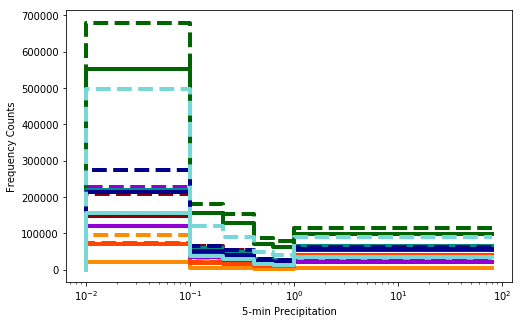

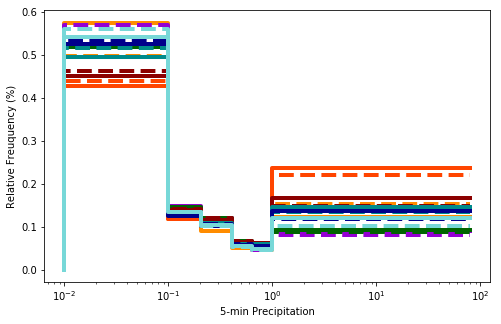

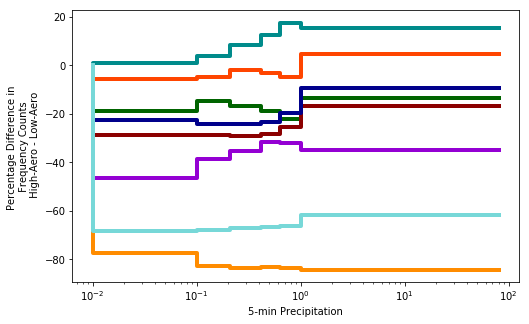

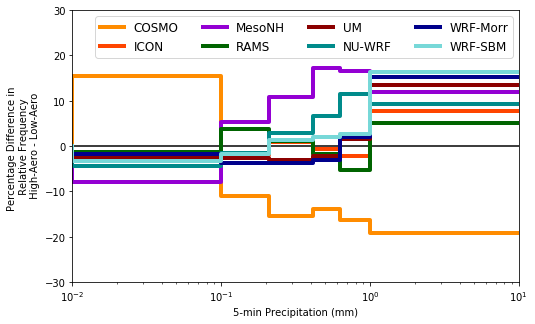

In [22]:
fig = plt.figure(figsize=[8,5]);
cnt = 0 
for model in models:
    for case in cases:
        plt_data = np.insert(mod_hist[model,case],0,0)
        plt.step(bin_e,plt_data,color=color[model],
            linestyle=ls[case],
            linewidth=4,
            label=f'{modelnames[cnt]} {casenames[cntc]}')
plt.xscale('log')
plt.xlabel('5-min Precipitation')
plt.ylabel('Frequency Counts')

fig = plt.figure(figsize=[8,5]);
for model in models:
    for case in cases:
        plt_data = np.insert(mod_hist[model,case],0,0)
        plt.step(bin_e,plt_data/np.nansum(plt_data),color=color[model],
            linestyle=ls[case],
            linewidth=4,
            label=f'{modelnames[cnt]} {casenames[cntc]}')
plt.xscale('log')
plt.xlabel('5-min Precipitation')
plt.ylabel('Relative Freuquency (%)')
    
fig = plt.figure(figsize=[8,5]);
for model in models:
        plt_data = (mod_hist[model,'POL']-mod_hist[model,'CLN'])/mod_hist[model,'CLN']*100
        plt_data = np.insert(plt_data,0,0)
        plt.step(bin_e,plt_data,color=color[model],
            linestyle='-',
            linewidth=4,
            label=f'{modelnames[cnt]} {casenames[cntc]}')
plt.xscale('log')
plt.xlabel('5-min Precipitation')
plt.ylabel('Percentage Difference in \n Frequency Counts \n High-Aero - Low-Aero')

fig = plt.figure(figsize=[8,5]);
cnt = 0
plt.plot([0.01,10],[0,0],'-k')
for model in models:
        plt_data = (mod_hist[model,'POL']/np.nansum(mod_hist[model,'POL']) - mod_hist[model,'CLN']/np.nansum(mod_hist[model,'CLN'])) / (mod_hist[model,'CLN']/np.nansum(mod_hist[model,'CLN'])) * 100 
        plt_data = np.insert(plt_data,0,0)
        plt.step(bin_e,plt_data,color=color[model],
            linestyle='-',
            linewidth=4,
            label=f'{modelnames[cnt]}')
        cnt = cnt + 1
plt.xscale('log')
plt.ylim([-30,30])
plt.xlim([0.01,10])
plt.xlabel('5-min Precipitation (mm)')
plt.ylabel('Percentage Difference in \n Relative Frequency \n High-Aero - Low-Aero')
plt.legend(fontsize=12,ncol=4)           
    
#plt.hist(mod_5min_pcp[model,case].ravel())
#for i in np.arange(0,144):
#    fig = plt.figure(figsize=[6,6])
#    plt.contourf(mod_5min_pcp[model,case][:,:,i])
#    plt.colorbar()
#    plt.title(i)
#    plt.show()

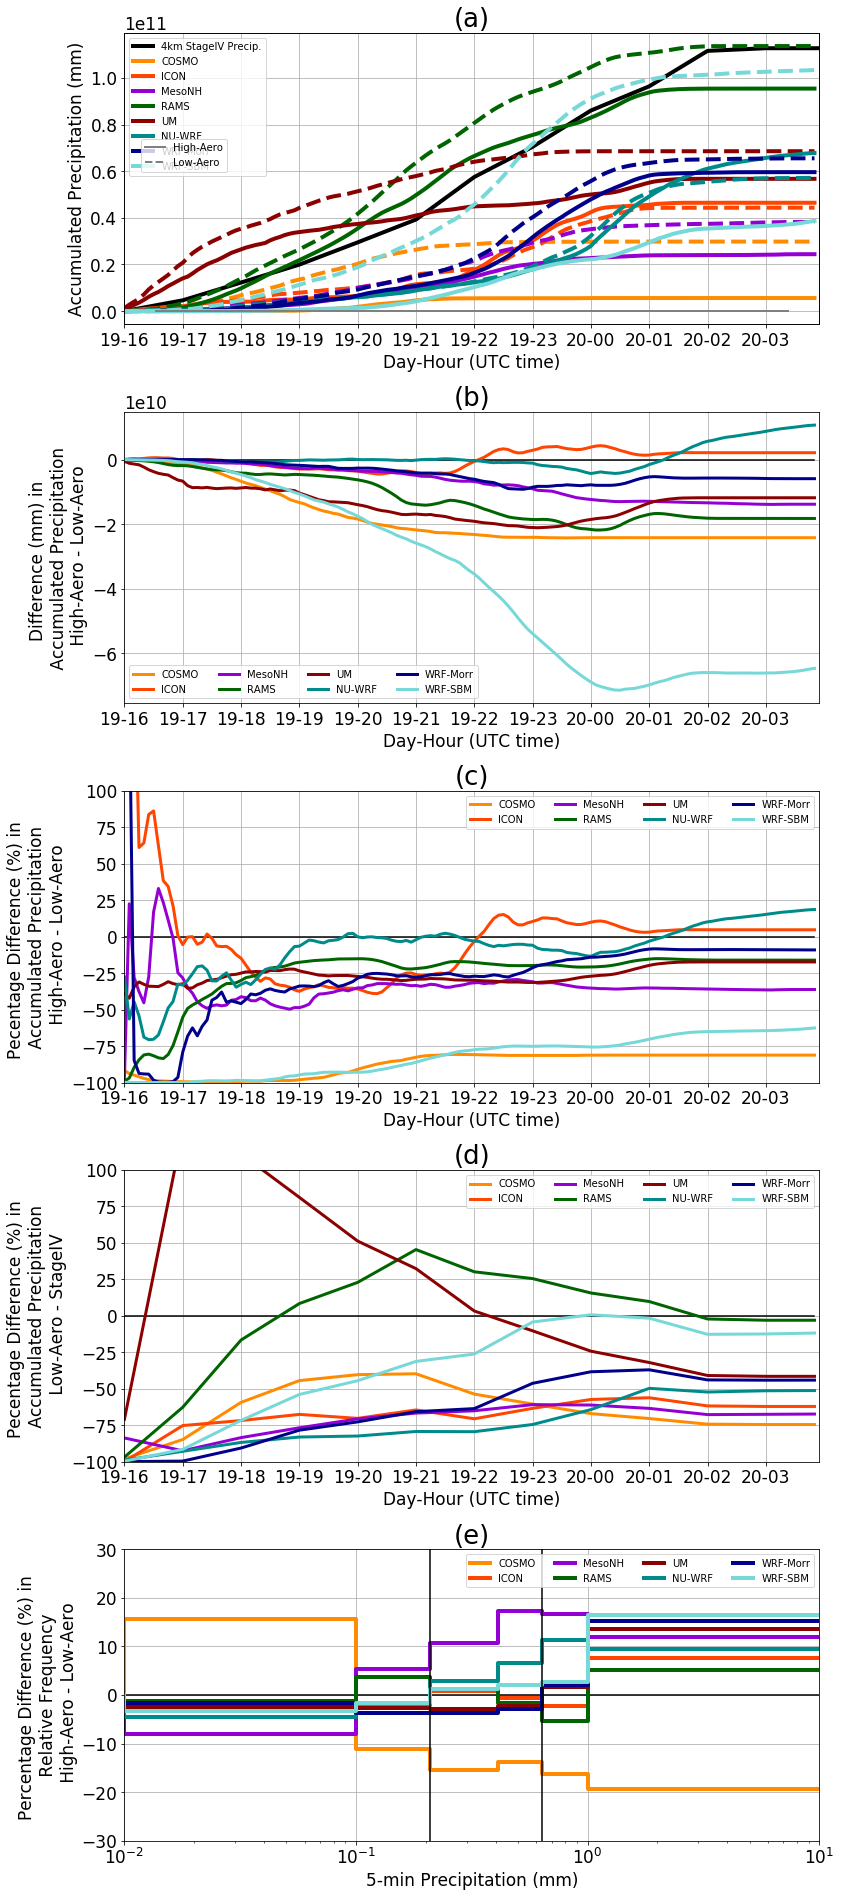

In [23]:
#### UPDATED April 23, 2024

ls={}
ls['CLN']='--'
ls['POL']='-'

vlines = [0.2083,0.6333]

mod_pcp_t = copy.deepcopy(precip_cum_time_scr_modi)
st4_pcp_t = copy.deepcopy(precip_cum_time_scr_st4)

mod_factor = 500*500
st4_factor = 4000*4000
area_factor = 1.14
lfs = 10
plt.rcParams.update({"font.size":17})

ttls = ['(a)','(b)','(c)','(d)','(e)']
tfs = 26

fig,ax = plt.subplots(5,1,figsize=[12,27])

# Plot Time Series of Accumulated Precipitation
i = 0
ax[i].plot(st4_dates[4:17],(st4_pcp_t[4:17]-st4_pcp_t[4])*st4_factor,'-k',lw=4,label='4km StageIV Precip.')
cnt = 0
for model in models:
    cntc = 0
    for case in cases:    
        if case == 'POL':
            labelname = f'{modelnames[cnt]}'
        elif case == 'CLN':
            labelname = '_nolegend_'
        ax[i].plot(mod_dates[0:143],mod_pcp_t[model,case][0:143]*st4_factor,
            color=color[model],
            linestyle=ls[case],
            linewidth=4,
            label=labelname)
        cntc = cntc + 1
    cnt = cnt + 1
    
ax2 = ax[i].twiny()
ax2.set(xticklabels=[])
ax2.tick_params(top=False)
ax2.plot(mod_dates[0:143],np.ones(len(mod_dates[0:143]))*-10000000,'-',lw=2,color='gray',label='High-Aero')
ax2.plot(mod_dates[0:143],np.ones(len(mod_dates[0:143]))*-10000000,'--',lw=2,color='gray',label='Low-Aero')

ax[i].set_xlim([mod_dates[0],mod_dates[143]])
ax[i].legend(fontsize=lfs,ncol=1)
ax[i].set_ylabel('Accumulated Precipitation (mm)')
ax[i].set_xlabel('Day-Hour (UTC time)')
ax[i].xaxis.set_major_formatter(mdates.DateFormatter("%d-%H"))
ax[i].set_title(ttls[i],fontsize=tfs)

handles, labels = ax2.get_legend_handles_labels()
fig.legend(handles, labels, fontsize=10, loc='upper left',bbox_to_anchor=[0.157,0.907])
#fig.legend(handles, labels, fontsize=14, loc='lower left', ncol=1, bbox_to_anchor=[0.04,0.01])

#handles, labels = ax[0].get_legend_handles_labels()
#fig.legend(handles, labels, fontsize=12, loc='lower right',bbox_to_anchor=[0.95,0.43])
#fig.legend(handles, labels, fontsize=14, loc='lower left',ncol=4, bbox_to_anchor=[0.15,0.01])
    


i = 1
# Plot Absolute Difference in High-Aero - Low-Aero
ax[i].plot(mod_dates[0:143],np.zeros(len(mod_dates[0:143])),'-k')
cntm = 0
for model in models:
    ax[i].plot(mod_dates[0:143],(mod_pcp_t[model,'POL'][0:143]-mod_pcp_t[model,'CLN'][0:143])*st4_factor,
            color=color[model],
            linestyle='-',
            linewidth=3,
            label=f'{modelnames[cntm]}')
    cntm = cntm + 1
ax[i].legend(fontsize=lfs,ncol=4,loc='lower left')
ax[i].set_ylabel('Difference (mm) in \n Accumulated Precipitation \n High-Aero - Low-Aero')
ax[i].set_xlabel('Day-Hour (UTC time)')
ax[i].xaxis.set_major_formatter(mdates.DateFormatter("%d-%H"))
ax[i].set_xlim([mod_dates[0],mod_dates[143]])
ax[i].set_title(ttls[i],fontsize=tfs)

i = 2
# Plot Percentage Difference in High-Aero - Low-Aero
ax[i].plot(mod_dates[0:143],np.zeros(len(mod_dates[0:143])),'-k')
cntm = 0
for model in models:
    ax[i].plot(mod_dates[0:143],((mod_pcp_t[model,'POL'][0:143]-mod_pcp_t[model,'CLN'][0:143]))/mod_pcp_t[model,'CLN'][0:143]*100,
            color=color[model],
            linestyle='-',
            linewidth=3,
            label=f'{modelnames[cntm]}')
    cntm = cntm + 1
ax[i].legend(fontsize=lfs,ncol=4)
ax[i].set_xlim([mod_dates[0],mod_dates[143]])
ax[i].set_ylim([-100,100])
ax[i].set_ylabel('Pecentage Difference (%) in \n Accumulated Precipitation \n High-Aero - Low-Aero')
ax[i].set_xlabel('Day-Hour (UTC time)')
ax[i].xaxis.set_major_formatter(mdates.DateFormatter("%d-%H"))
ax[i].set_title(ttls[i],fontsize=tfs)

i = 3
# Plot Absolute Difference in Low_Aero - StageIV
ax[i].plot(mod_dates[0:143],np.zeros(len(mod_dates[0:143])),'-k')
cntm = 0

tids = np.arange(0,143,12)
tids = np.append(tids,142)

for model in models:
    ax[i].plot(mod_dates[tids],((mod_pcp_t[model,'CLN'][tids]*st4_factor)-(st4_pcp_t[4:17]*st4_factor))/(st4_pcp_t[4:17]*st4_factor)*100,
            color=color[model],
            linestyle='-',
            linewidth=3,
            label=f'{modelnames[cntm]}')
    cntm = cntm + 1
ax[i].legend(fontsize=lfs,ncol=4,loc='upper right')
ax[i].set_ylabel('Pecentage Difference (%) in \n Accumulated Precipitation \n Low-Aero - StageIV')
ax[i].set_xlabel('Day-Hour (UTC time)')
ax[i].xaxis.set_major_formatter(mdates.DateFormatter("%d-%H"))
ax[i].set_ylim([-100,100])
ax[i].set_xlim([mod_dates[0],mod_dates[143]])
ax[i].set_title(ttls[i],fontsize=tfs)

i = 4
# Plot Difference in 5-min Relative Frequency in High-Aero - Low-Aero
cnt = 0
ax[i].plot([0.01,10],[0,0],'-k')
for model in models:
    plt_data = (mod_hist[model,'POL']/np.nansum(mod_hist[model,'POL']) - mod_hist[model,'CLN']/np.nansum(mod_hist[model,'CLN'])) / (mod_hist[model,'CLN']/np.nansum(mod_hist[model,'CLN'])) * 100 
    plt_data = np.insert(plt_data,0,0)
    ax[i].step(bin_e,plt_data,color=color[model],
        linestyle='-',
        linewidth=4,
        label=f'{modelnames[cnt]}')
    cnt = cnt + 1
ax[i].set_xscale('log')
ax[i].plot([vlines[0],vlines[0]],[-30,30],'-k')
ax[i].plot([vlines[1],vlines[1]],[-30,30],'-k')
ax[i].set_ylim([-30,30])
ax[i].set_xlim([0.01,10])
ax[i].set_xlabel('5-min Precipitation (mm)')
ax[i].set_ylabel('Percentage Difference (%) in \n Relative Frequency \n High-Aero - Low-Aero')
ax[i].legend(fontsize=lfs,ncol=4)           
ax[i].set_title(ttls[i],fontsize=tfs)

# Add Grid Lines to all Panels
for i in np.arange(0,5):
    ax[i].grid()

plt.tight_layout()
plt.subplots_adjust(top=0.98, bottom=0.05, hspace=0.3)
plt.savefig('/gws/nopw/j04/acpc/public/pmarin/BAMS/Figs_2024/Precip_Subpanel_Plot.pdf')

COSMO_KIT
-74.56521961819823
-95.21562193795285
-81.18962306641217
ICON
-62.1666252270245
-60.360570622938425
4.773707381177485
MesoNH_Toulouse
-67.3771635645515
-79.18155197906565
-36.18443306691536
RAMS_CSU
-3.0178710439508283
-18.586747111156004
-16.053345327427028
UM_LEEDS
-41.50014999241576
-51.60061452364396
-17.265795604465186
WRF_NASA
-51.25123573926265
-42.151437517970436
18.666725935084393
WRF_OXF
-44.10122816396273
-49.15601056083263
-9.042743213923602
WRF_PNNL
-11.820319622911134
-66.98427063161327
-62.55857446160014


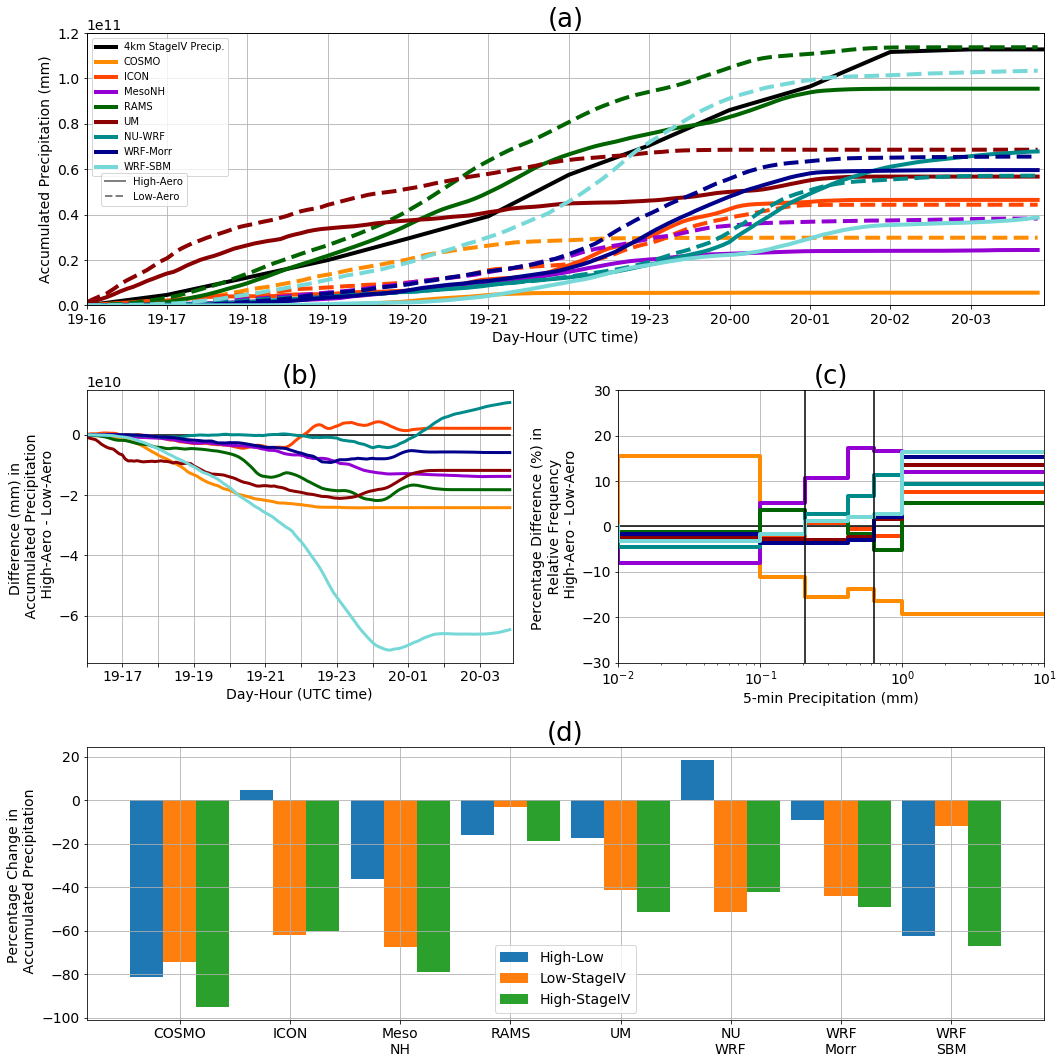

In [46]:
#### UPDATED August 26, 2024

import matplotlib.gridspec as gridspec
ls={}
ls['CLN']='--'
ls['POL']='-'

vlines = [0.2083,0.6333]

mod_pcp_t = copy.deepcopy(precip_cum_time_scr_modi)
st4_pcp_t = copy.deepcopy(precip_cum_time_scr_st4)

mod_factor = 500*500
st4_factor = 4000*4000
area_factor = 1.14
lfs = 10
plt.rcParams.update({"font.size":14})

ttls = ['(a)','(b)','(c)','(d)']
tfs = 26

#fig,ax = plt.subplots(4,1,figsize=[10,22])

fig = plt.figure(constrained_layout=True,figsize=[15,15])
ax = OrderedDict()

spec = gridspec.GridSpec(ncols=2, nrows=3, figure=fig)
ax[0] = fig.add_subplot(spec[0, 0:2])
ax[1] = fig.add_subplot(spec[1, 0])
ax[2] = fig.add_subplot(spec[1, 1])
ax[3] = fig.add_subplot(spec[2, 0:2])


# Plot Time Series of Accumulated Precipitation
i = 0
ax[i].plot(st4_dates[4:17],(st4_pcp_t[4:17]-st4_pcp_t[4])*st4_factor,'-k',lw=4,label='4km StageIV Precip.')
cnt = 0
for model in models:
    cntc = 0
    for case in cases:    
        if case == 'POL':
            labelname = f'{modelnames[cnt]}'
        elif case == 'CLN':
            labelname = '_nolegend_'
        ax[i].plot(mod_dates[0:143],mod_pcp_t[model,case][0:143]*st4_factor,
            color=color[model],
            linestyle=ls[case],
            linewidth=4,
            label=labelname)
        cntc = cntc + 1
    cnt = cnt + 1
    
ax2 = ax[i].twiny()
ax2.set(xticklabels=[])
ax2.tick_params(top=False)
ax2.plot(mod_dates[0:143],np.ones(len(mod_dates[0:143]))*-1000000000000,'-',lw=2,color='gray',label='High-Aero')
ax2.plot(mod_dates[0:143],np.ones(len(mod_dates[0:143]))*-1000000000000,'--',lw=2,color='gray',label='Low-Aero')
ax2.set_ylim([0,1.2e11])

ax[i].set_xlim([mod_dates[0],mod_dates[143]])
ax[i].legend(fontsize=lfs,ncol=1)
ax[i].set_ylabel('Accumulated Precipitation (mm)')
ax[i].set_xlabel('Day-Hour (UTC time)')
ax[i].xaxis.set_major_formatter(mdates.DateFormatter("%d-%H"))
ax[i].set_title(ttls[i],fontsize=tfs)

handles, labels = ax2.get_legend_handles_labels()
fig.legend(handles, labels, fontsize=lfs, loc='upper left',bbox_to_anchor=[0.089,0.83])
#fig.legend(handles, labels, fontsize=14, loc='lower left', ncol=1, bbox_to_anchor=[0.04,0.01])

#handles, labels = ax[0].get_legend_handles_labels()
#fig.legend(handles, labels, fontsize=12, loc='lower right',bbox_to_anchor=[0.95,0.43])
#fig.legend(handles, labels, fontsize=14, loc='lower left',ncol=4, bbox_to_anchor=[0.15,0.01])
    
i = 1
# Plot Absolute Difference in High-Aero - Low-Aero
ax[i].plot(mod_dates[0:143],np.zeros(len(mod_dates[0:143])),'-k')
cntm = 0
for model in models:
    ax[i].plot(mod_dates[0:143],(mod_pcp_t[model,'POL'][0:143]-mod_pcp_t[model,'CLN'][0:143])*st4_factor,
            color=color[model],
            linestyle='-',
            linewidth=3,
            label=f'{modelnames[cntm]}')
    cntm = cntm + 1
#ax[i].legend(fontsize=lfs,ncol=4,loc='lower left')
ax[i].set_ylabel('Difference (mm) in \n Accumulated Precipitation \n High-Aero - Low-Aero')
ax[i].set_xlabel('Day-Hour (UTC time)')
ax[i].xaxis.set_major_formatter(mdates.DateFormatter("%d-%H"))
ax[i].set_xlim([mod_dates[0],mod_dates[143]])
ax[i].set_title(ttls[i],fontsize=tfs)
# remove every other xtick label
for label in ax[i].xaxis.get_ticklabels()[::2]:
    label.set_visible(False)

i = 2
# Plot Difference in 5-min Relative Frequency in High-Aero - Low-Aero
cnt = 0
ax[i].plot([0.01,10],[0,0],'-k')
for model in models:
    plt_data = (mod_hist[model,'POL']/np.nansum(mod_hist[model,'POL']) - mod_hist[model,'CLN']/np.nansum(mod_hist[model,'CLN'])) / (mod_hist[model,'CLN']/np.nansum(mod_hist[model,'CLN'])) * 100 
    plt_data = np.insert(plt_data,0,0)
    ax[i].step(bin_e,plt_data,color=color[model],
        linestyle='-',
        linewidth=4,
        label=f'{modelnames[cnt]}')
    cnt = cnt + 1
ax[i].set_xscale('log')
ax[i].plot([vlines[0],vlines[0]],[-30,30],'-k')
ax[i].plot([vlines[1],vlines[1]],[-30,30],'-k')
ax[i].set_ylim([-30,30])
ax[i].set_xlim([0.01,10])
ax[i].set_xlabel('5-min Precipitation (mm)')
ax[i].set_ylabel('Percentage Difference (%) in \n Relative Frequency \n High-Aero - Low-Aero')
#ax[i].legend(fontsize=lfs,ncol=4)           
ax[i].set_title(ttls[i],fontsize=tfs)

# Calculate percentage differences between model simulations and STAGEIV
pct_arr = np.zeros((3,8))
cntm = 0
for model in models:
    print(model)
    print((((mod_pcp_t[model,'CLN'][142])-(st4_pcp_t[17]))/st4_pcp_t[17])*100)
    print((((mod_pcp_t[model,'POL'][142])-(st4_pcp_t[17]))/st4_pcp_t[17])*100)
    print((((mod_pcp_t[model,'POL'][142])-(mod_pcp_t[model,'CLN'][142]))/mod_pcp_t[model,'CLN'][142])*100)##

    pct_arr[0,cntm] = (((mod_pcp_t[model,'POL'][142])-(mod_pcp_t[model,'CLN'][142]))/mod_pcp_t[model,'CLN'][142])*100
    pct_arr[1,cntm] = (((mod_pcp_t[model,'CLN'][142])-(st4_pcp_t[17]))/st4_pcp_t[17])*100
    pct_arr[2,cntm] = (((mod_pcp_t[model,'POL'][142])-(st4_pcp_t[17]))/st4_pcp_t[17])*100
    
    cntm = cntm + 1  

x_pos = np.arange(len(models))    
wid = 0.3
ax[3].bar(x_pos-0.3,pct_arr[0,:],width=wid,label='High-Low')
ax[3].bar(x_pos-0,pct_arr[1,:],width=wid,label='Low-StageIV')
ax[3].bar(x_pos+0.3,pct_arr[2,:],width=wid,label='High-StageIV')
ax[3].set_title('(d)',fontsize=tfs)
ax[3].set_xticks(x_pos)
ax[3].set_xticklabels(modelnames2)
ax[3].set_ylabel('Percentage Change in \n Accumulated Precipitation')
ax[3].legend()

# Add Grid Lines to all Panels
for i in np.arange(0,4):
    ax[i].grid()

plt.tight_layout()
#plt.savefig('/gws/nopw/j04/acpc/public/pmarin/BAMS/Figs_2024/Precip_Subpanel_Plot_202408.pdf')
plt.savefig('/gws/nopw/j04/acpc/public/pmarin/BAMS/Figs_2024/Precip_Subpanel_Plot_20241002_v1.pdf')


In [38]:
np.ones(len(mod_dates[0:143]))*-1000000

array([-1000000., -1000000., -1000000., -1000000., -1000000., -1000000.,
       -1000000., -1000000., -1000000., -1000000., -1000000., -1000000.,
       -1000000., -1000000., -1000000., -1000000., -1000000., -1000000.,
       -1000000., -1000000., -1000000., -1000000., -1000000., -1000000.,
       -1000000., -1000000., -1000000., -1000000., -1000000., -1000000.,
       -1000000., -1000000., -1000000., -1000000., -1000000., -1000000.,
       -1000000., -1000000., -1000000., -1000000., -1000000., -1000000.,
       -1000000., -1000000., -1000000., -1000000., -1000000., -1000000.,
       -1000000., -1000000., -1000000., -1000000., -1000000., -1000000.,
       -1000000., -1000000., -1000000., -1000000., -1000000., -1000000.,
       -1000000., -1000000., -1000000., -1000000., -1000000., -1000000.,
       -1000000., -1000000., -1000000., -1000000., -1000000., -1000000.,
       -1000000., -1000000., -1000000., -1000000., -1000000., -1000000.,
       -1000000., -1000000., -1000000., -1000000., 

COSMO_KIT
-74.56521961819823
-95.21562193795285
-81.18962306641217
ICON
-62.1666252270245
-60.360570622938425
4.773707381177485
MesoNH_Toulouse
-67.3771635645515
-79.18155197906565
-36.18443306691536
RAMS_CSU
-3.0178710439508283
-18.586747111156004
-16.053345327427028
UM_LEEDS
-41.50014999241576
-51.60061452364396
-17.265795604465186
WRF_NASA
-51.25123573926265
-42.151437517970436
18.666725935084393
WRF_OXF
-44.10122816396273
-49.15601056083263
-9.042743213923602
WRF_PNNL
-11.820319622911134
-66.98427063161327
-62.55857446160014


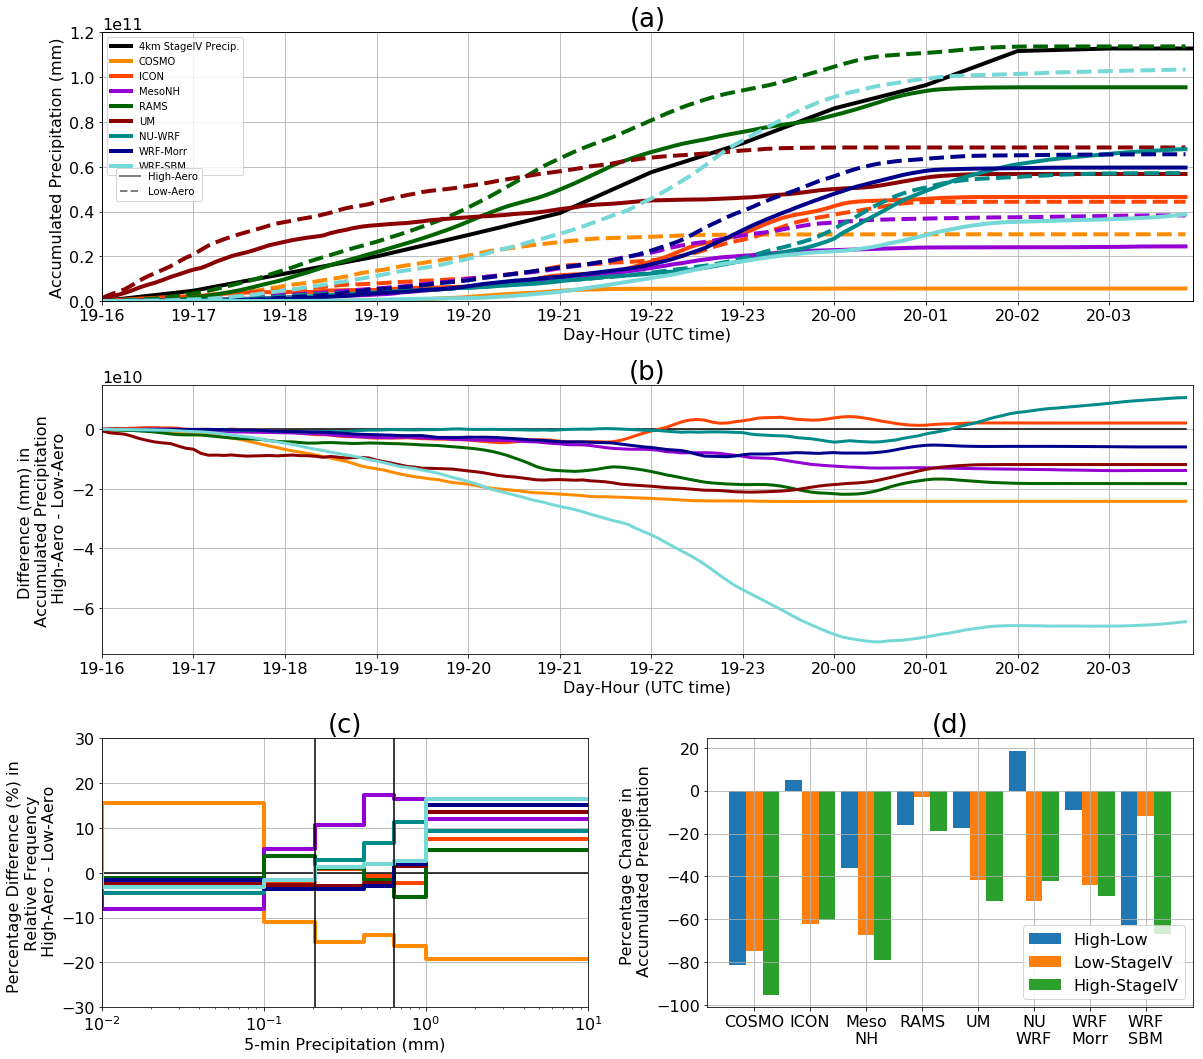

In [44]:
#### UPDATED August 26, 2024

import matplotlib.gridspec as gridspec
ls={}
ls['CLN']='--'
ls['POL']='-'

vlines = [0.2083,0.6333]

mod_pcp_t = copy.deepcopy(precip_cum_time_scr_modi)
st4_pcp_t = copy.deepcopy(precip_cum_time_scr_st4)

mod_factor = 500*500
st4_factor = 4000*4000
area_factor = 1.14
lfs = 10
plt.rcParams.update({"font.size":16})

ttls = ['(a)','(b)','(c)','(d)']
tfs = 26

#fig,ax = plt.subplots(4,1,figsize=[10,22])

fig = plt.figure(constrained_layout=True,figsize=[17,15])
ax = OrderedDict()

spec = gridspec.GridSpec(ncols=2, nrows=3, figure=fig)
ax[0] = fig.add_subplot(spec[0, 0:2])
ax[1] = fig.add_subplot(spec[1, 0:2])
ax[2] = fig.add_subplot(spec[2, 0])
ax[3] = fig.add_subplot(spec[2, 1])


# Plot Time Series of Accumulated Precipitation
i = 0
ax[i].plot(st4_dates[4:17],(st4_pcp_t[4:17]-st4_pcp_t[4])*st4_factor,'-k',lw=4,label='4km StageIV Precip.')
cnt = 0
for model in models:
    cntc = 0
    for case in cases:    
        if case == 'POL':
            labelname = f'{modelnames[cnt]}'
        elif case == 'CLN':
            labelname = '_nolegend_'
        ax[i].plot(mod_dates[0:143],mod_pcp_t[model,case][0:143]*st4_factor,
            color=color[model],
            linestyle=ls[case],
            linewidth=4,
            label=labelname)
        cntc = cntc + 1
    cnt = cnt + 1
    
ax2 = ax[i].twiny()
ax2.set(xticklabels=[])
ax2.tick_params(top=False)
ax2.plot(mod_dates[0:143],np.ones(len(mod_dates[0:143]))*-1000000000000,'-',lw=2,color='gray',label='High-Aero')
ax2.plot(mod_dates[0:143],np.ones(len(mod_dates[0:143]))*-1000000000000,'--',lw=2,color='gray',label='Low-Aero')
ax2.set_ylim([0,1.2e11])

ax[i].set_xlim([mod_dates[0],mod_dates[143]])
ax[i].legend(fontsize=lfs,ncol=1)
ax[i].set_ylabel('Accumulated Precipitation (mm)')
ax[i].set_xlabel('Day-Hour (UTC time)')
ax[i].xaxis.set_major_formatter(mdates.DateFormatter("%d-%H"))
ax[i].set_title(ttls[i],fontsize=tfs)

handles, labels = ax2.get_legend_handles_labels()
fig.legend(handles, labels, fontsize=lfs, loc='upper left',bbox_to_anchor=[0.091,0.83])
#fig.legend(handles, labels, fontsize=14, loc='lower left', ncol=1, bbox_to_anchor=[0.04,0.01])

#handles, labels = ax[0].get_legend_handles_labels()
#fig.legend(handles, labels, fontsize=12, loc='lower right',bbox_to_anchor=[0.95,0.43])
#fig.legend(handles, labels, fontsize=14, loc='lower left',ncol=4, bbox_to_anchor=[0.15,0.01])
    
i = 1
# Plot Absolute Difference in High-Aero - Low-Aero
ax[i].plot(mod_dates[0:143],np.zeros(len(mod_dates[0:143])),'-k')
cntm = 0
for model in models:
    ax[i].plot(mod_dates[0:143],(mod_pcp_t[model,'POL'][0:143]-mod_pcp_t[model,'CLN'][0:143])*st4_factor,
            color=color[model],
            linestyle='-',
            linewidth=3,
            label=f'{modelnames[cntm]}')
    cntm = cntm + 1
#ax[i].legend(fontsize=lfs,ncol=4,loc='lower left')
ax[i].set_ylabel('Difference (mm) in \n Accumulated Precipitation \n High-Aero - Low-Aero')
ax[i].set_xlabel('Day-Hour (UTC time)')
ax[i].xaxis.set_major_formatter(mdates.DateFormatter("%d-%H"))
ax[i].set_xlim([mod_dates[0],mod_dates[143]])
ax[i].set_title(ttls[i],fontsize=tfs)

i = 2
# Plot Difference in 5-min Relative Frequency in High-Aero - Low-Aero
cnt = 0
ax[i].plot([0.01,10],[0,0],'-k')
for model in models:
    plt_data = (mod_hist[model,'POL']/np.nansum(mod_hist[model,'POL']) - mod_hist[model,'CLN']/np.nansum(mod_hist[model,'CLN'])) / (mod_hist[model,'CLN']/np.nansum(mod_hist[model,'CLN'])) * 100 
    plt_data = np.insert(plt_data,0,0)
    ax[i].step(bin_e,plt_data,color=color[model],
        linestyle='-',
        linewidth=4,
        label=f'{modelnames[cnt]}')
    cnt = cnt + 1
ax[i].set_xscale('log')
ax[i].plot([vlines[0],vlines[0]],[-30,30],'-k')
ax[i].plot([vlines[1],vlines[1]],[-30,30],'-k')
ax[i].set_ylim([-30,30])
ax[i].set_xlim([0.01,10])
ax[i].set_xlabel('5-min Precipitation (mm)')
ax[i].set_ylabel('Percentage Difference (%) in \n Relative Frequency \n High-Aero - Low-Aero')
#ax[i].legend(fontsize=lfs,ncol=4)           
ax[i].set_title(ttls[i],fontsize=tfs)

# Calculate percentage differences between model simulations and STAGEIV
pct_arr = np.zeros((3,8))
cntm = 0
for model in models:
    print(model)
    print((((mod_pcp_t[model,'CLN'][142])-(st4_pcp_t[17]))/st4_pcp_t[17])*100)
    print((((mod_pcp_t[model,'POL'][142])-(st4_pcp_t[17]))/st4_pcp_t[17])*100)
    print((((mod_pcp_t[model,'POL'][142])-(mod_pcp_t[model,'CLN'][142]))/mod_pcp_t[model,'CLN'][142])*100)##

    pct_arr[0,cntm] = (((mod_pcp_t[model,'POL'][142])-(mod_pcp_t[model,'CLN'][142]))/mod_pcp_t[model,'CLN'][142])*100
    pct_arr[1,cntm] = (((mod_pcp_t[model,'CLN'][142])-(st4_pcp_t[17]))/st4_pcp_t[17])*100
    pct_arr[2,cntm] = (((mod_pcp_t[model,'POL'][142])-(st4_pcp_t[17]))/st4_pcp_t[17])*100
    
    cntm = cntm + 1  

x_pos = np.arange(len(models))    
wid = 0.3
ax[3].bar(x_pos-0.3,pct_arr[0,:],width=wid,label='High-Low')
ax[3].bar(x_pos-0,pct_arr[1,:],width=wid,label='Low-StageIV')
ax[3].bar(x_pos+0.3,pct_arr[2,:],width=wid,label='High-StageIV')
ax[3].set_title('(d)',fontsize=tfs)
ax[3].set_xticks(x_pos)
ax[3].set_xticklabels(modelnames2)
ax[3].set_ylabel('Percentage Change in \n Accumulated Precipitation')
ax[3].legend()

# Add Grid Lines to all Panels
for i in np.arange(0,4):
    ax[i].grid()

plt.tight_layout()
plt.savefig('/gws/nopw/j04/acpc/public/pmarin/BAMS/Figs_2024/Precip_Subpanel_Plot_20241002_v2.pdf')


In [48]:
mod_pcp_t[model,'CLN'][142]

6463.041507501646

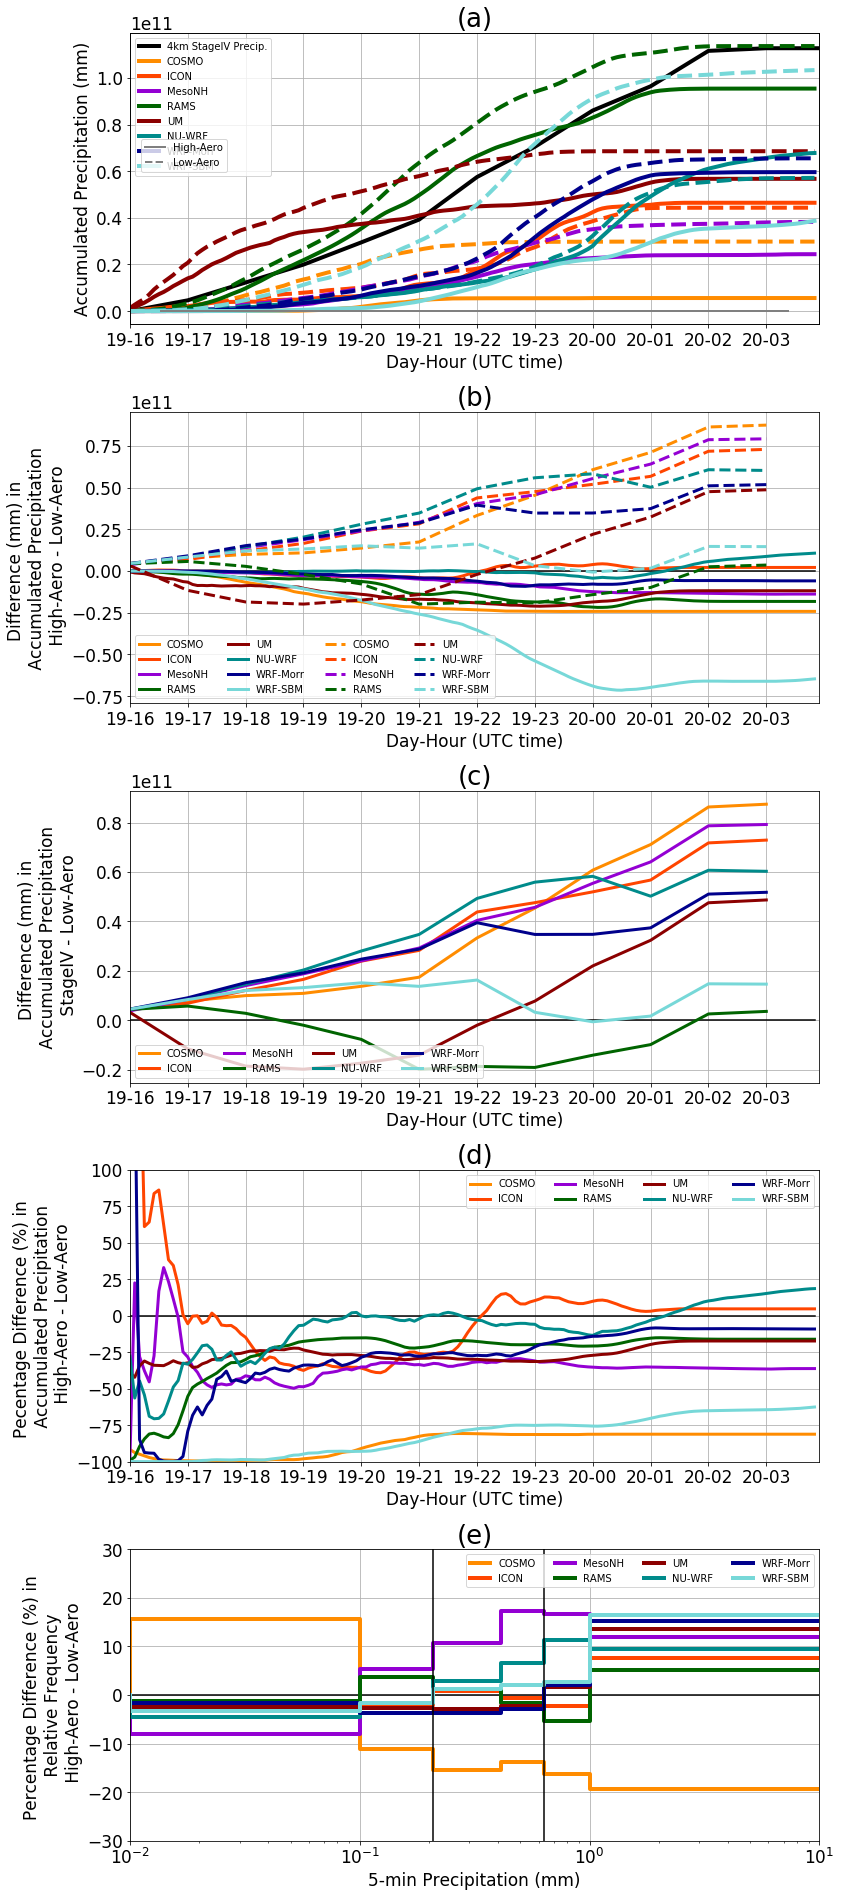

In [35]:
#### UPDATED April 23, 2024

ls={}
ls['CLN']='--'
ls['POL']='-'

vlines = [0.2083,0.6333]

mod_pcp_t = copy.deepcopy(precip_cum_time_scr_modi)
st4_pcp_t = copy.deepcopy(precip_cum_time_scr_st4)

mod_factor = 500*500
st4_factor = 4000*4000
area_factor = 1.14
lfs = 10
plt.rcParams.update({"font.size":17})

ttls = ['(a)','(b)','(c)','(d)','(e)']
tfs = 26

fig,ax = plt.subplots(5,1,figsize=[12,27])

# Plot Time Series of Accumulated Precipitation
i = 0
ax[i].plot(st4_dates[4:17],(st4_pcp_t[4:17]-st4_pcp_t[4])*st4_factor,'-k',lw=4,label='4km StageIV Precip.')
cnt = 0
for model in models:
    cntc = 0
    for case in cases:    
        if case == 'POL':
            labelname = f'{modelnames[cnt]}'
        elif case == 'CLN':
            labelname = '_nolegend_'
        ax[i].plot(mod_dates[0:143],mod_pcp_t[model,case][0:143]*st4_factor,
            color=color[model],
            linestyle=ls[case],
            linewidth=4,
            label=labelname)
        cntc = cntc + 1
    cnt = cnt + 1
    
ax2 = ax[i].twiny()
ax2.set(xticklabels=[])
ax2.tick_params(top=False)
ax2.plot(mod_dates[0:143],np.ones(len(mod_dates[0:143]))*-10000000,'-',lw=2,color='gray',label='High-Aero')
ax2.plot(mod_dates[0:143],np.ones(len(mod_dates[0:143]))*-10000000,'--',lw=2,color='gray',label='Low-Aero')

ax[i].set_xlim([mod_dates[0],mod_dates[143]])
ax[i].legend(fontsize=lfs,ncol=1)
ax[i].set_ylabel('Accumulated Precipitation (mm)')
ax[i].set_xlabel('Day-Hour (UTC time)')
ax[i].xaxis.set_major_formatter(mdates.DateFormatter("%d-%H"))
ax[i].set_title(ttls[i],fontsize=tfs)

handles, labels = ax2.get_legend_handles_labels()
fig.legend(handles, labels, fontsize=10, loc='upper left',bbox_to_anchor=[0.157,0.907])
#fig.legend(handles, labels, fontsize=14, loc='lower left', ncol=1, bbox_to_anchor=[0.04,0.01])

#handles, labels = ax[0].get_legend_handles_labels()
#fig.legend(handles, labels, fontsize=12, loc='lower right',bbox_to_anchor=[0.95,0.43])
#fig.legend(handles, labels, fontsize=14, loc='lower left',ncol=4, bbox_to_anchor=[0.15,0.01])
    


i = 1
# Plot Absolute Difference in High-Aero - Low-Aero
ax[i].plot(mod_dates[0:143],np.zeros(len(mod_dates[0:143])),'-k')
cntm = 0
for model in models:
    ax[i].plot(mod_dates[0:143],(mod_pcp_t[model,'POL'][0:143]-mod_pcp_t[model,'CLN'][0:143])*st4_factor,
            color=color[model],
            linestyle='-',
            linewidth=3,
            label=f'{modelnames[cntm]}')
    cntm = cntm + 1

tids = np.arange(0,143,12)
cntm = 0
for model in models:
    ax[i].plot(mod_dates[tids],((st4_pcp_t[4:16]*st4_factor)-(mod_pcp_t[model,'CLN'][tids]*st4_factor)),
            color=color[model],
            linestyle='--',
            linewidth=3,
            label=f'{modelnames[cntm]}')
    cntm = cntm + 1
    
ax[i].legend(fontsize=lfs,ncol=4,loc='lower left')
ax[i].set_ylabel('Difference (mm) in \n Accumulated Precipitation \n High-Aero - Low-Aero')
ax[i].set_xlabel('Day-Hour (UTC time)')
ax[i].xaxis.set_major_formatter(mdates.DateFormatter("%d-%H"))
ax[i].set_xlim([mod_dates[0],mod_dates[143]])
ax[i].set_title(ttls[i],fontsize=tfs)




i = 2
# Plot Absolute Difference in Low_Aero - StageIV
ax[i].plot(mod_dates[0:143],np.zeros(len(mod_dates[0:143])),'-k')
cntm = 0
tids = np.arange(0,143,12)
for model in models:
    ax[i].plot(mod_dates[tids],((st4_pcp_t[4:16]*st4_factor)-(mod_pcp_t[model,'CLN'][tids]*st4_factor)),
            color=color[model],
            linestyle='-',
            linewidth=3,
            label=f'{modelnames[cntm]}')
    cntm = cntm + 1
ax[i].legend(fontsize=lfs,ncol=4,loc='lower left')
ax[i].set_ylabel('Difference (mm) in \n Accumulated Precipitation \n StageIV - Low-Aero')
ax[i].set_xlabel('Day-Hour (UTC time)')
ax[i].xaxis.set_major_formatter(mdates.DateFormatter("%d-%H"))
ax[i].set_xlim([mod_dates[0],mod_dates[143]])
ax[i].set_title(ttls[i],fontsize=tfs)

i = 3
# Plot Percentage Difference in High-Aero - Low-Aero
ax[i].plot(mod_dates[0:143],np.zeros(len(mod_dates[0:143])),'-k')
cntm = 0
for model in models:
    ax[i].plot(mod_dates[0:143],((mod_pcp_t[model,'POL'][0:143]-mod_pcp_t[model,'CLN'][0:143]))/mod_pcp_t[model,'CLN'][0:143]*100,
            color=color[model],
            linestyle='-',
            linewidth=3,
            label=f'{modelnames[cntm]}')
    cntm = cntm + 1
ax[i].legend(fontsize=lfs,ncol=4)
ax[i].set_xlim([mod_dates[0],mod_dates[143]])
ax[i].set_ylim([-100,100])
ax[i].set_ylabel('Pecentage Difference (%) in \n Accumulated Precipitation \n High-Aero - Low-Aero')
ax[i].set_xlabel('Day-Hour (UTC time)')
ax[i].xaxis.set_major_formatter(mdates.DateFormatter("%d-%H"))
ax[i].set_title(ttls[i],fontsize=tfs)

i = 4
# Plot Difference in 5-min Relative Frequency in High-Aero - Low-Aero
cnt = 0
ax[i].plot([0.01,10],[0,0],'-k')
for model in models:
    plt_data = (mod_hist[model,'POL']/np.nansum(mod_hist[model,'POL']) - mod_hist[model,'CLN']/np.nansum(mod_hist[model,'CLN'])) / (mod_hist[model,'CLN']/np.nansum(mod_hist[model,'CLN'])) * 100 
    plt_data = np.insert(plt_data,0,0)
    ax[i].step(bin_e,plt_data,color=color[model],
        linestyle='-',
        linewidth=4,
        label=f'{modelnames[cnt]}')
    cnt = cnt + 1
ax[i].set_xscale('log')
ax[i].plot([vlines[0],vlines[0]],[-30,30],'-k')
ax[i].plot([vlines[1],vlines[1]],[-30,30],'-k')
ax[i].set_ylim([-30,30])
ax[i].set_xlim([0.01,10])
ax[i].set_xlabel('5-min Precipitation (mm)')
ax[i].set_ylabel('Percentage Difference (%) in \n Relative Frequency \n High-Aero - Low-Aero')
ax[i].legend(fontsize=lfs,ncol=4)           
ax[i].set_title(ttls[i],fontsize=tfs)

# Add Grid Lines to all Panels
for i in np.arange(0,5):
    ax[i].grid()

plt.tight_layout()
plt.subplots_adjust(top=0.98, bottom=0.05, hspace=0.3)
#plt.savefig('/gws/nopw/j04/acpc/public/pmarin/BAMS/Figs_2024/Precip_Subpanel_Plot.pdf')

In [30]:
print(len(st4_pcp_t[4:16]))
print(st4_dates[4:16])
ids = np.arange(0,143,12)
print(len(mod_pcp_t[model,'POL'][ids]))
print(mod_dates[ids])

12
[datetime.datetime(2013, 6, 19, 16, 0)
 datetime.datetime(2013, 6, 19, 17, 0)
 datetime.datetime(2013, 6, 19, 18, 0)
 datetime.datetime(2013, 6, 19, 19, 0)
 datetime.datetime(2013, 6, 19, 20, 0)
 datetime.datetime(2013, 6, 19, 21, 0)
 datetime.datetime(2013, 6, 19, 22, 0)
 datetime.datetime(2013, 6, 19, 23, 0)
 datetime.datetime(2013, 6, 20, 0, 0) datetime.datetime(2013, 6, 20, 1, 0)
 datetime.datetime(2013, 6, 20, 2, 0) datetime.datetime(2013, 6, 20, 3, 0)]
12
[datetime.datetime(2013, 6, 19, 16, 0)
 datetime.datetime(2013, 6, 19, 17, 0)
 datetime.datetime(2013, 6, 19, 18, 0)
 datetime.datetime(2013, 6, 19, 19, 0)
 datetime.datetime(2013, 6, 19, 20, 0)
 datetime.datetime(2013, 6, 19, 21, 0)
 datetime.datetime(2013, 6, 19, 22, 0)
 datetime.datetime(2013, 6, 19, 23, 0)
 datetime.datetime(2013, 6, 20, 0, 0) datetime.datetime(2013, 6, 20, 1, 0)
 datetime.datetime(2013, 6, 20, 2, 0) datetime.datetime(2013, 6, 20, 3, 0)]


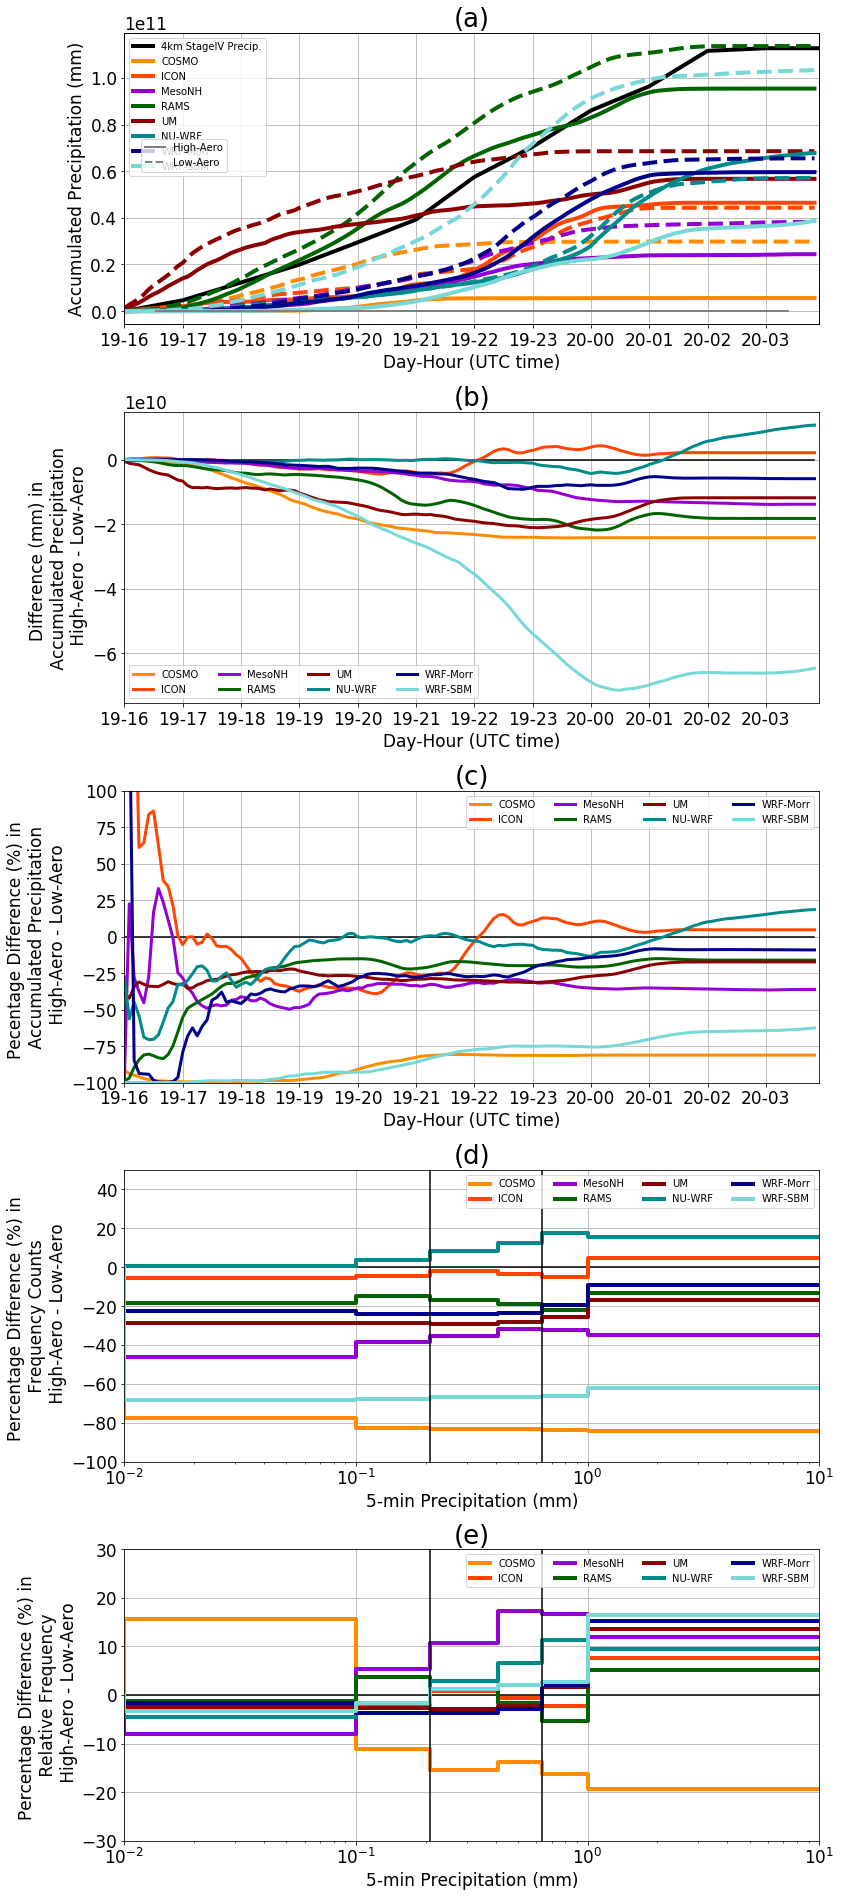

In [20]:
ls={}
ls['CLN']='--'
ls['POL']='-'

vlines = [0.2083,0.6333]

mod_pcp_t = copy.deepcopy(precip_cum_time_scr_modi)
st4_pcp_t = copy.deepcopy(precip_cum_time_scr_st4)

mod_factor = 500*500
st4_factor = 4000*4000
area_factor = 1.14
lfs = 10
plt.rcParams.update({"font.size":17})

ttls = ['(a)','(b)','(c)','(d)','(e)']
tfs = 26

fig,ax = plt.subplots(5,1,figsize=[12,27])

# Plot Time Series of Accumulated Precipitation
i = 0
ax[i].plot(st4_dates[4:17],(st4_pcp_t[4:17]-st4_pcp_t[4])*st4_factor,'-k',lw=4,label='4km StageIV Precip.')
cnt = 0
for model in models:
    cntc = 0
    for case in cases:    
        if case == 'POL':
            labelname = f'{modelnames[cnt]}'
        elif case == 'CLN':
            labelname = '_nolegend_'
        ax[i].plot(mod_dates[0:143],mod_pcp_t[model,case][0:143]*st4_factor,
            color=color[model],
            linestyle=ls[case],
            linewidth=4,
            label=labelname)
        cntc = cntc + 1
    cnt = cnt + 1
    
ax2 = ax[i].twiny()
ax2.set(xticklabels=[])
ax2.tick_params(top=False)
ax2.plot(mod_dates[0:143],np.ones(len(mod_dates[0:143]))*-10000000,'-',lw=2,color='gray',label='High-Aero')
ax2.plot(mod_dates[0:143],np.ones(len(mod_dates[0:143]))*-10000000,'--',lw=2,color='gray',label='Low-Aero')

ax[i].set_xlim([mod_dates[0],mod_dates[143]])
ax[i].legend(fontsize=lfs,ncol=1)
ax[i].set_ylabel('Accumulated Precipitation (mm)')
ax[i].set_xlabel('Day-Hour (UTC time)')
ax[i].xaxis.set_major_formatter(mdates.DateFormatter("%d-%H"))
ax[i].set_title(ttls[i],fontsize=tfs)

handles, labels = ax2.get_legend_handles_labels()
fig.legend(handles, labels, fontsize=10, loc='upper left',bbox_to_anchor=[0.157,0.907])
#fig.legend(handles, labels, fontsize=14, loc='lower left', ncol=1, bbox_to_anchor=[0.04,0.01])

#handles, labels = ax[0].get_legend_handles_labels()
#fig.legend(handles, labels, fontsize=12, loc='lower right',bbox_to_anchor=[0.95,0.43])
#fig.legend(handles, labels, fontsize=14, loc='lower left',ncol=4, bbox_to_anchor=[0.15,0.01])
    


i = 1
# Plot Absolute Difference in High-Aero - Low-Aero
ax[i].plot(mod_dates[0:143],np.zeros(len(mod_dates[0:143])),'-k')
cntm = 0
for model in models:
    ax[i].plot(mod_dates[0:143],(mod_pcp_t[model,'POL'][0:143]-mod_pcp_t[model,'CLN'][0:143])*st4_factor,
            color=color[model],
            linestyle='-',
            linewidth=3,
            label=f'{modelnames[cntm]}')
    cntm = cntm + 1
ax[i].legend(fontsize=lfs,ncol=4,loc='lower left')
ax[i].set_ylabel('Difference (mm) in \n Accumulated Precipitation \n High-Aero - Low-Aero')
ax[i].set_xlabel('Day-Hour (UTC time)')
ax[i].xaxis.set_major_formatter(mdates.DateFormatter("%d-%H"))
ax[i].set_xlim([mod_dates[0],mod_dates[143]])
ax[i].set_title(ttls[i],fontsize=tfs)

i = 2
# Plot Percentage Difference in High-Aero - Low-Aero
ax[i].plot(mod_dates[0:143],np.zeros(len(mod_dates[0:143])),'-k')
cntm = 0
for model in models:
    ax[i].plot(mod_dates[0:143],((mod_pcp_t[model,'POL'][0:143]-mod_pcp_t[model,'CLN'][0:143]))/mod_pcp_t[model,'CLN'][0:143]*100,
            color=color[model],
            linestyle='-',
            linewidth=3,
            label=f'{modelnames[cntm]}')
    cntm = cntm + 1
ax[i].legend(fontsize=lfs,ncol=4)
ax[i].set_xlim([mod_dates[0],mod_dates[143]])
ax[i].set_ylim([-100,100])
ax[i].set_ylabel('Pecentage Difference (%) in \n Accumulated Precipitation \n High-Aero - Low-Aero')
ax[i].set_xlabel('Day-Hour (UTC time)')
ax[i].xaxis.set_major_formatter(mdates.DateFormatter("%d-%H"))
ax[i].set_title(ttls[i],fontsize=tfs)

i = 3
# Plot Difference in 5-min Frequency in High-Aero - Low-Aero
ax[i].plot([0.01,10],[0,0],'-k')
cnt = 0
for model in models:
    plt_data = (mod_hist[model,'POL']-mod_hist[model,'CLN'])/mod_hist[model,'CLN']*100
    plt_data = np.insert(plt_data,0,0)
    ax[i].step(bin_e,plt_data,color=color[model],
        linestyle='-',
        linewidth=4,
        label=f'{modelnames[cnt]}')
    cnt = cnt + 1

ax[i].plot([vlines[0],vlines[0]],[-100,50],'-k')
ax[i].plot([vlines[1],vlines[1]],[-100,50],'-k')
    
ax[i].set_xscale('log')
ax[i].set_xlim([0.01,10])
ax[i].set_ylim([-100,50])
ax[i].set_xlabel('5-min Precipitation (mm)')
ax[i].set_ylabel('Percentage Difference (%) in \n Frequency Counts \n High-Aero - Low-Aero')
ax[i].legend(fontsize=lfs,ncol=4)
ax[i].set_title(ttls[i],fontsize=tfs)

i = 4
# Plot Difference in 5-min Relative Frequency in High-Aero - Low-Aero
cnt = 0
ax[i].plot([0.01,10],[0,0],'-k')
for model in models:
    plt_data = (mod_hist[model,'POL']/np.nansum(mod_hist[model,'POL']) - mod_hist[model,'CLN']/np.nansum(mod_hist[model,'CLN'])) / (mod_hist[model,'CLN']/np.nansum(mod_hist[model,'CLN'])) * 100 
    plt_data = np.insert(plt_data,0,0)
    ax[i].step(bin_e,plt_data,color=color[model],
        linestyle='-',
        linewidth=4,
        label=f'{modelnames[cnt]}')
    cnt = cnt + 1
ax[i].set_xscale('log')
ax[i].plot([vlines[0],vlines[0]],[-30,30],'-k')
ax[i].plot([vlines[1],vlines[1]],[-30,30],'-k')
ax[i].set_ylim([-30,30])
ax[i].set_xlim([0.01,10])
ax[i].set_xlabel('5-min Precipitation (mm)')
ax[i].set_ylabel('Percentage Difference (%) in \n Relative Frequency \n High-Aero - Low-Aero')
ax[i].legend(fontsize=lfs,ncol=4)           
ax[i].set_title(ttls[i],fontsize=tfs)

# Add Grid Lines to all Panels
for i in np.arange(0,5):
    ax[i].grid()

plt.tight_layout()
plt.subplots_adjust(top=0.98, bottom=0.05, hspace=0.3)
#plt.savefig('/gws/nopw/j04/acpc/public/pmarin/BAMS/Figs_2024/Precip_Subpanel_Plot.pdf')

/gws/nopw/j04/acpc/public/pmarin/BAMS/Precip/


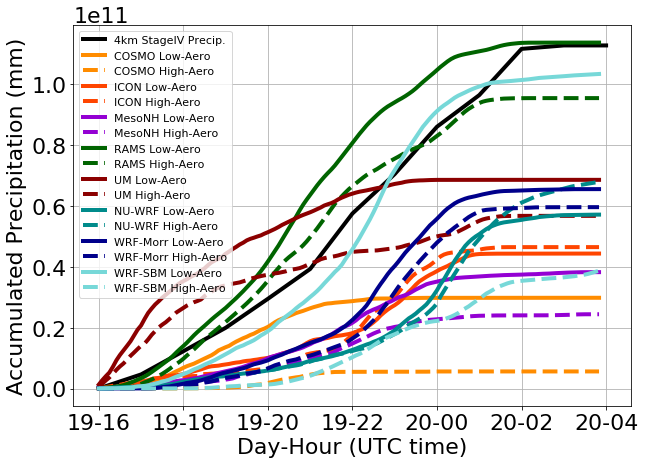

In [78]:
ls={}
ls['CLN']='-'
ls['POL']='--'

mod_factor = 500*500
st4_factor = 4000*4000
area_factor = 1.14
plt.rcParams.update({"font.size":22})
fig,ax = plt.subplots(1,1,figsize=[10,7])
plt.plot(st4_dates[4:17],(precip_cum_time_scr_st4[4:17]-precip_cum_time_scr_st4[4])*st4_factor,'-k',lw=4,label='4km StageIV Precip.')
cnt = 0
for model in models:
    cntc = 0
    for case in cases:    
        ax.plot(mod_dates[0:143],precip_cum_time_scr_modi[model,case][0:143]*st4_factor,
            color=color[model],
            linestyle=ls[case],
            linewidth=4,
            label=f'{modelnames[cnt]} {casenames[cntc]}')
        cntc = cntc + 1
    cnt = cnt + 1

ax.legend(fontsize=11,ncol=1)
ax.set_ylabel('Accumulated Precipitation (mm)')
ax.set_xlabel('Day-Hour (UTC time)')
ax.xaxis.set_major_formatter(mdates.DateFormatter("%d-%H"))
plt.grid()
print(plotdir)
#plt.savefig(plotdir+'/Accumulated_Precip_with_Time'+str(lat_bnd)+str(lon_bnd)+'_June2020_Interp.png')
#plt.savefig(plotdir+'/Accumulated_Precip_with_Time'+str(lat_bnd)+str(lon_bnd)+'_June2020_Interp.pdf')

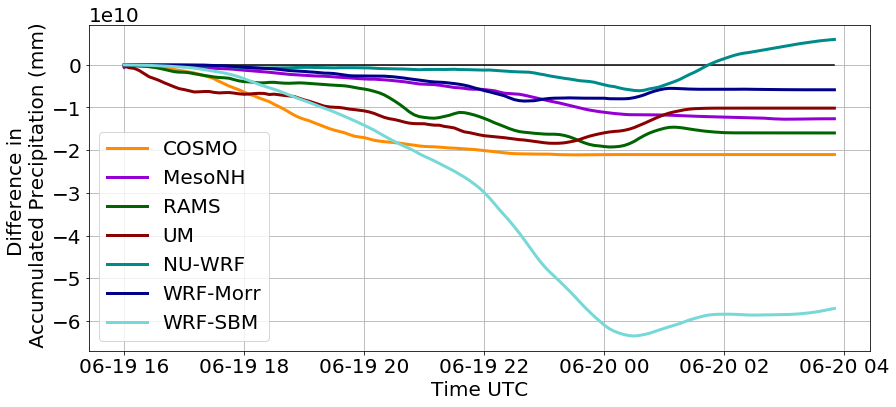

In [54]:
ls={}
ls['CLN']='--'
ls['POL']='-'

mod_factor = 500*500
st4_factor = 4000*4000
area_factor = 1.14
plt.rcParams.update({"font.size":20})
fig = plt.figure(figsize=[14,6])
plt.plot(mod_dates[0:143],np.zeros(len(mod_dates[0:143])),'-k')
cntm = 0
for model in models:
    plt.plot(mod_dates[0:143],(precip_cum_time_scr_mod[model,'POL'][0:143]-precip_cum_time_scr_mod[model,'CLN'][0:143])*mod_factor,
            color=color[model],
            linestyle=ls[case],
            linewidth=3,
            label=f'{modelnames[cntm]}')
    cntm = cntm + 1
plt.legend()
plt.grid()
plt.ylabel('Difference in \n Accumulated Precipitation (mm)')
plt.xlabel('Time UTC')
#plt.savefig(plotdir+'/Accumulated_Precip_DIF_with_Time'+str(lat_bnd)+str(lon_bnd)+'_Apr0820_Interp.pdf')

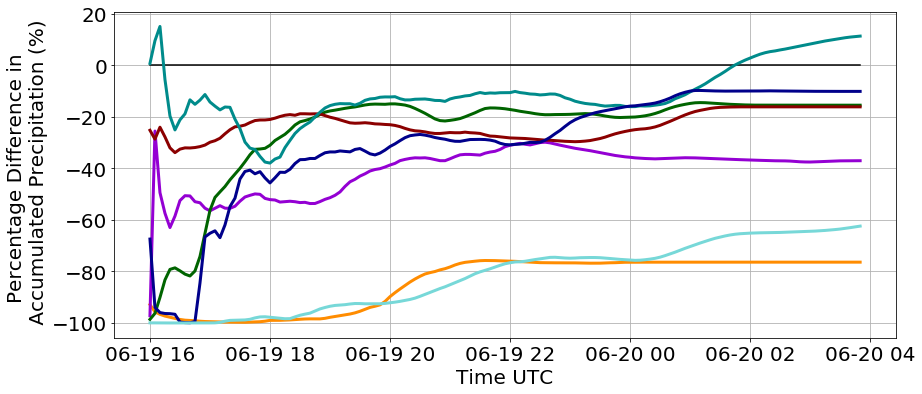

In [53]:
ls={}
ls['CLN']='--'
ls['POL']='-'

mod_factor = 500*500
st4_factor = 4000*4000
area_factor = 1.14
plt.rcParams.update({"font.size":20})
fig = plt.figure(figsize=[14,6])
plt.plot(mod_dates[0:143],np.zeros(len(mod_dates[0:143])),'-k')
cntm = 0
for model in models:
    plt.plot(mod_dates[0:143],(precip_cum_time_scr_mod[model,'POL'][0:143]-precip_cum_time_scr_mod[model,'CLN'][0:143])/precip_cum_time_scr_mod[model,'CLN'][0:143]*100,
            color=color[model],
            linestyle=ls[case],
            linewidth=3,
            label=f'{modelnames[cntm]}')
    cntm = cntm + 1
#plt.legend()
plt.grid()
plt.ylabel('Percentage Difference in \n Accumulated Precipitation (%)')
plt.xlabel('Time UTC')
plt.savefig(plotdir+'/Accumulated_Precip_PDIF_with_Time'+str(lat_bnd)+str(lon_bnd)+'_Apr0820_Interp.pdf')

COSMO_KIT
MesoNH_Toulouse
RAMS_CSU
UM_LEEDS
WRF_NASA
WRF_OXF
WRF_PNNL


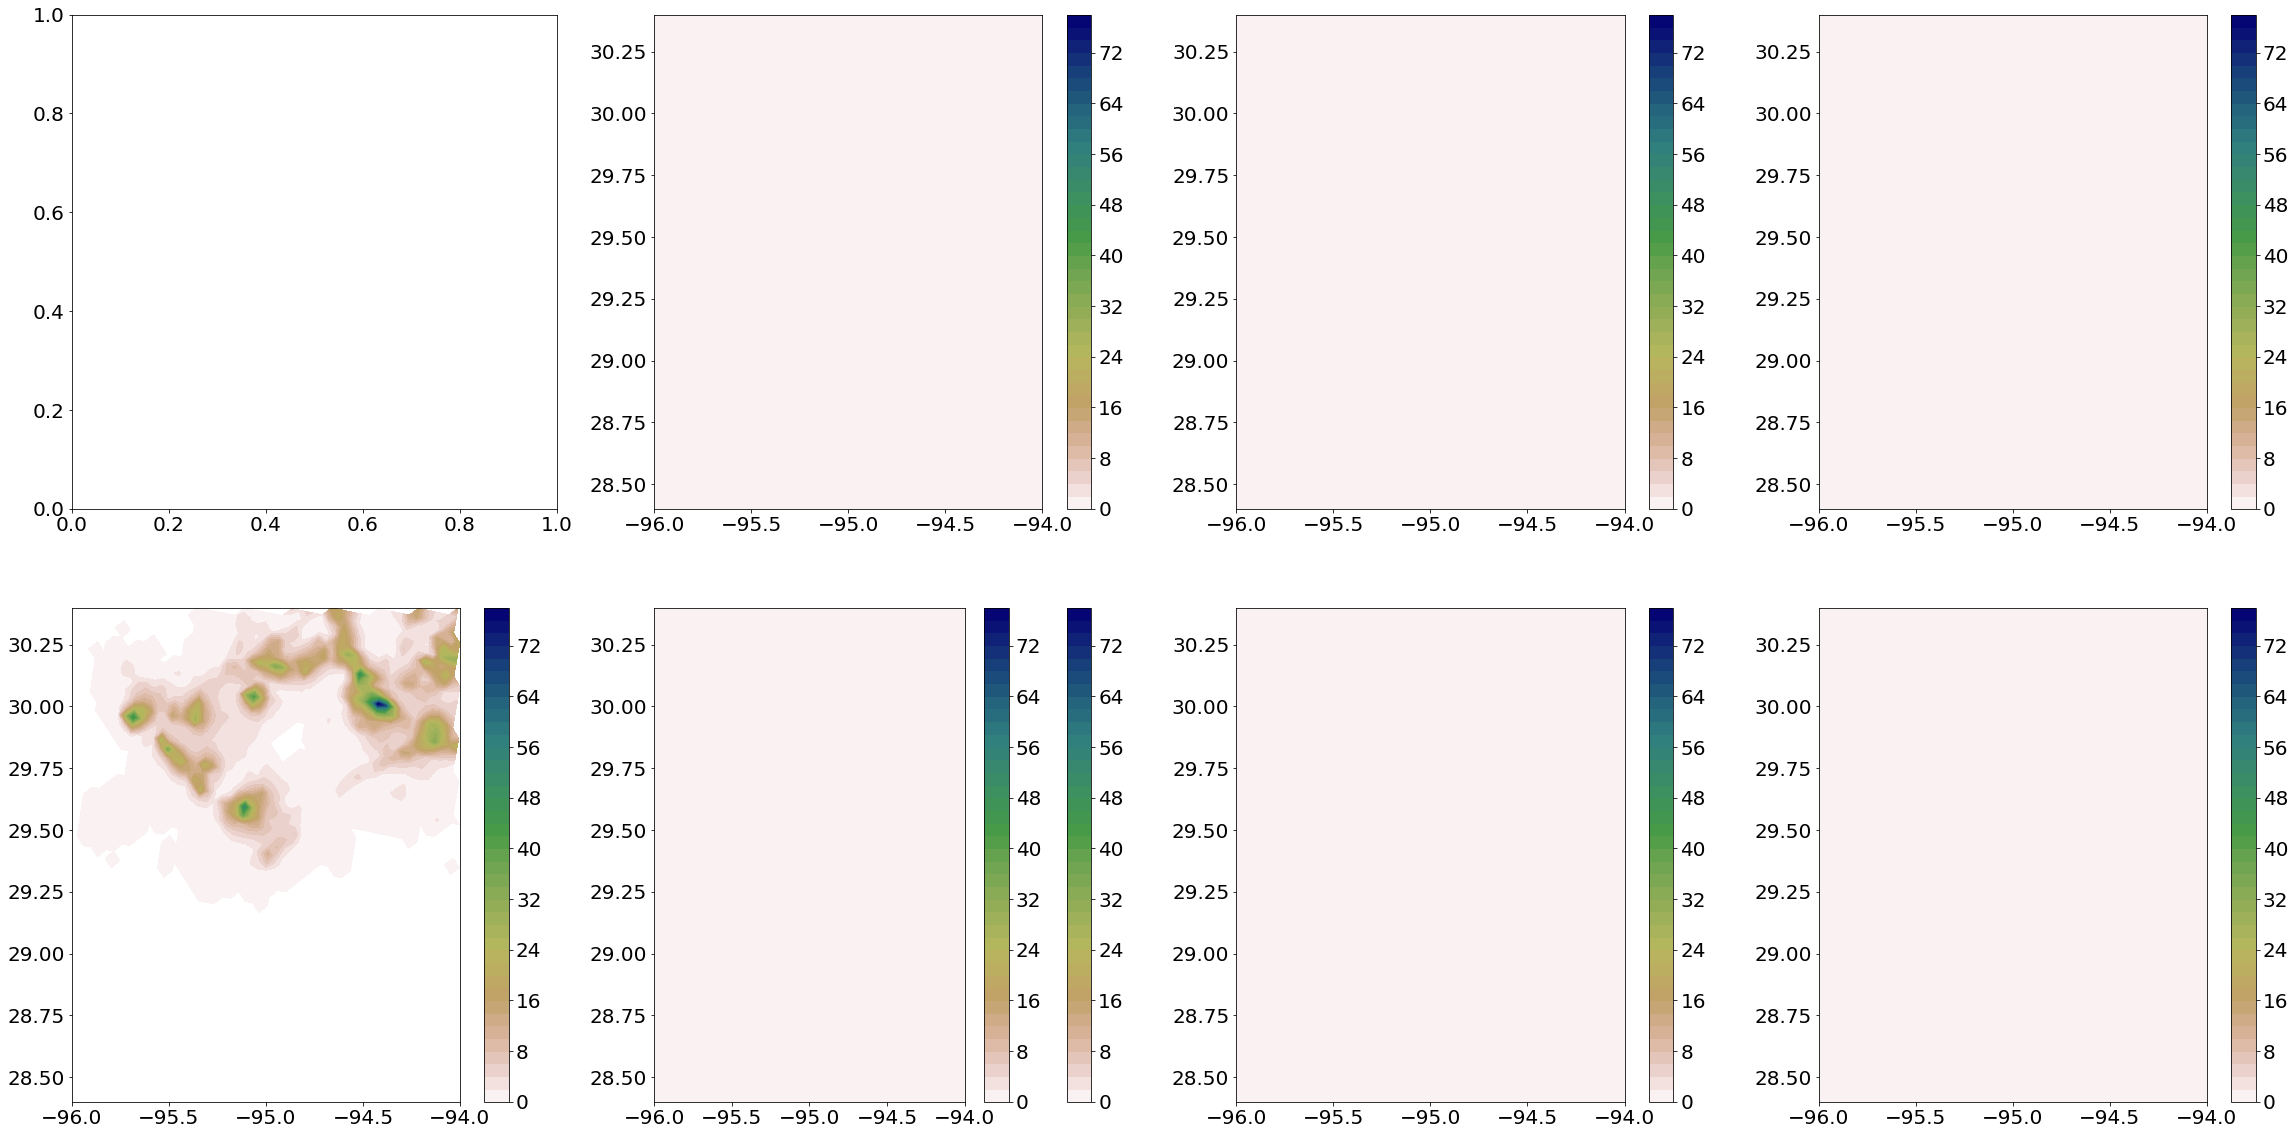

In [45]:

clevs = np.arange(0,80,2);
fig,axs = plt.subplots(2,4,figsize=(40,20))

#fig = plt.figure(figsize=[10,10])
case = 'POL'
cntm = 0; cntc = 1
for model in models:
    print(model)
    a = axs[cntm,cntc].contourf(mod_lon[model,case],mod_lat[model,case],precip_cum_scr_mod[model,case][:,:,144], levels = clevs, \
                               cmap=plt.cm.gist_earth_r,vmin = 0, vmax=80)
    axs[cntm,cntc].set_xlim(lon_bnd[1],lon_bnd[0])
    axs[cntm,cntc].set_ylim(lat_bnd[0],lat_bnd[1])
    c = plt.colorbar(a,ax=axs[cntm,cntc])
#    plt.clim(c, [0,80])

    cntc = cntc + 1
    if cntc == 4:
        cntc = 1; cntm = 1
    
    
a = axs[1,0].contourf(lon_st4,lat_st4,precip_cum_scr_st4[:,:,17]-precip_cum_scr_st4[:,:,4],  levels = clevs, \
                     cmap=plt.cm.gist_earth_r, vmin = 0, vmax=80)
axs[1,0].set_xlim(lon_bnd[1],lon_bnd[0])
axs[1,0].set_ylim(lat_bnd[0],lat_bnd[1])
plt.colorbar(a,ax = axs[1,0])
plt.savefig(plotdir+'Accumulated_Precip_Maps_'+str(lat_bnd)+str(lon_bnd)+'_'+case+'_Apr0820.png')

In [32]:
print(np.shape(precip_cum))

(77, 76, 24)


In [33]:
np.shape(lat_m); np.shape(lon_m)

(498, 498)

In [34]:
print(lat_st4)

[[28.374022 28.369154 28.364265 ... 27.961458 27.955011 27.948544]
 [28.40754  28.402666 28.39777  ... 27.994558 27.988106 27.98163 ]
 [28.441067 28.436188 28.431288 ... 28.02767  28.02121  28.014729]
 ...
 [30.884485 30.879234 30.873959 ... 30.439604 30.432657 30.425686]
 [30.918829 30.913572 30.90829  ... 30.473488 30.466534 30.459555]
 [30.953188 30.947926 30.942638 ... 30.507387 30.500425 30.49344 ]]


In [35]:
print(precip_cum_scr_st4[35,:,17])

[            nan             nan             nan             nan
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.29999995e-01  1.29999995e-01  1.29999995e-01  1.29999995e-01
  1.29999995e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  1.29999995e-01
  0.00000000e+00  1.29999995e-01  1.29999995e-01  1.29999995e-01
  2.50000000e-01  3.79999995e-01  2.59999990e-01  3.79999995e-01
  3.79999995e-01  6.39999986e-01  1.88999999e+00  1.88000000e+00
  1.50999999e+00  8.89999986e-01  6.29999995e-01  5.99999987e-02
  5.99999987e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000

In [36]:
precip_cum_scr_mod[model,case][200,:,144]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [37]:
import scipy
precip_cum_scr_mod_regrid = {}
precip_cum_time_scr_mod_regrid = {}
for model in models:
    for case in cases:
        regrid_data_t = np.zeros((77,76,145))
        for t in np.arange(0,145):
            print(model,case,t)
                        
            regrid_data = scipy.interpolate.griddata((mod_lon[model,case].flatten(),mod_lat[model,case].flatten()),precip_cum_scr_mod[model,case][:,:,t].flatten(),(lon_st4, lat_st4),method='linear')
            regrid_data_t[:,:,t] = copy.deepcopy(regrid_data)

#            fig, axs = plt.subplots(2,1,figsize=(10,10))
#            a = axs[0].contourf(mod_lon[model,case],mod_lat[model,case],precip_cum_scr_mod[model,case][:,:,t])
#            plt.colorbar(a,ax=axs[0])            
#            axs[1].contourf(lon_st4,lat_st4,regrid_data)
#            plt.colorbar(a,ax=axs[1])           
#            hhh

            
            
        precip_cum_scr_mod_regrid[model,case] = copy.deepcopy(regrid_data_t)            
        precip_cum_time_scr_mod_regrid[model,case] = np.nansum(np.nansum(precip_cum_scr_mod_regrid[model,case],axis=1),axis=0)

            

RAMS_CSU CLN 0
RAMS_CSU CLN 1
RAMS_CSU CLN 2
RAMS_CSU CLN 3
RAMS_CSU CLN 4
RAMS_CSU CLN 5
RAMS_CSU CLN 6
RAMS_CSU CLN 7
RAMS_CSU CLN 8
RAMS_CSU CLN 9
RAMS_CSU CLN 10
RAMS_CSU CLN 11
RAMS_CSU CLN 12
RAMS_CSU CLN 13
RAMS_CSU CLN 14
RAMS_CSU CLN 15
RAMS_CSU CLN 16
RAMS_CSU CLN 17
RAMS_CSU CLN 18
RAMS_CSU CLN 19
RAMS_CSU CLN 20
RAMS_CSU CLN 21
RAMS_CSU CLN 22
RAMS_CSU CLN 23
RAMS_CSU CLN 24
RAMS_CSU CLN 25
RAMS_CSU CLN 26
RAMS_CSU CLN 27
RAMS_CSU CLN 28
RAMS_CSU CLN 29
RAMS_CSU CLN 30
RAMS_CSU CLN 31
RAMS_CSU CLN 32
RAMS_CSU CLN 33
RAMS_CSU CLN 34
RAMS_CSU CLN 35
RAMS_CSU CLN 36
RAMS_CSU CLN 37
RAMS_CSU CLN 38
RAMS_CSU CLN 39
RAMS_CSU CLN 40
RAMS_CSU CLN 41
RAMS_CSU CLN 42
RAMS_CSU CLN 43
RAMS_CSU CLN 44
RAMS_CSU CLN 45
RAMS_CSU CLN 46
RAMS_CSU CLN 47
RAMS_CSU CLN 48
RAMS_CSU CLN 49
RAMS_CSU CLN 50
RAMS_CSU CLN 51
RAMS_CSU CLN 52
RAMS_CSU CLN 53
RAMS_CSU CLN 54
RAMS_CSU CLN 55
RAMS_CSU CLN 56
RAMS_CSU CLN 57
RAMS_CSU CLN 58
RAMS_CSU CLN 59
RAMS_CSU CLN 60
RAMS_CSU CLN 61
RAMS_CSU CLN 62
RA

COSMO_KIT POL 59
COSMO_KIT POL 60
COSMO_KIT POL 61
COSMO_KIT POL 62
COSMO_KIT POL 63
COSMO_KIT POL 64
COSMO_KIT POL 65
COSMO_KIT POL 66
COSMO_KIT POL 67
COSMO_KIT POL 68
COSMO_KIT POL 69
COSMO_KIT POL 70
COSMO_KIT POL 71
COSMO_KIT POL 72
COSMO_KIT POL 73
COSMO_KIT POL 74
COSMO_KIT POL 75
COSMO_KIT POL 76
COSMO_KIT POL 77
COSMO_KIT POL 78
COSMO_KIT POL 79
COSMO_KIT POL 80
COSMO_KIT POL 81
COSMO_KIT POL 82
COSMO_KIT POL 83
COSMO_KIT POL 84
COSMO_KIT POL 85
COSMO_KIT POL 86
COSMO_KIT POL 87
COSMO_KIT POL 88
COSMO_KIT POL 89
COSMO_KIT POL 90
COSMO_KIT POL 91
COSMO_KIT POL 92
COSMO_KIT POL 93
COSMO_KIT POL 94
COSMO_KIT POL 95
COSMO_KIT POL 96
COSMO_KIT POL 97
COSMO_KIT POL 98
COSMO_KIT POL 99
COSMO_KIT POL 100
COSMO_KIT POL 101
COSMO_KIT POL 102
COSMO_KIT POL 103
COSMO_KIT POL 104
COSMO_KIT POL 105
COSMO_KIT POL 106
COSMO_KIT POL 107
COSMO_KIT POL 108
COSMO_KIT POL 109
COSMO_KIT POL 110
COSMO_KIT POL 111
COSMO_KIT POL 112
COSMO_KIT POL 113
COSMO_KIT POL 114
COSMO_KIT POL 115
COSMO_KIT POL 1

WRF_NASA CLN 123
WRF_NASA CLN 124
WRF_NASA CLN 125
WRF_NASA CLN 126
WRF_NASA CLN 127
WRF_NASA CLN 128
WRF_NASA CLN 129
WRF_NASA CLN 130
WRF_NASA CLN 131
WRF_NASA CLN 132
WRF_NASA CLN 133
WRF_NASA CLN 134
WRF_NASA CLN 135
WRF_NASA CLN 136
WRF_NASA CLN 137
WRF_NASA CLN 138
WRF_NASA CLN 139
WRF_NASA CLN 140
WRF_NASA CLN 141
WRF_NASA CLN 142
WRF_NASA CLN 143
WRF_NASA CLN 144
WRF_NASA POL 0
WRF_NASA POL 1
WRF_NASA POL 2
WRF_NASA POL 3
WRF_NASA POL 4
WRF_NASA POL 5
WRF_NASA POL 6
WRF_NASA POL 7
WRF_NASA POL 8
WRF_NASA POL 9
WRF_NASA POL 10
WRF_NASA POL 11
WRF_NASA POL 12
WRF_NASA POL 13
WRF_NASA POL 14
WRF_NASA POL 15
WRF_NASA POL 16
WRF_NASA POL 17
WRF_NASA POL 18
WRF_NASA POL 19
WRF_NASA POL 20
WRF_NASA POL 21
WRF_NASA POL 22
WRF_NASA POL 23
WRF_NASA POL 24
WRF_NASA POL 25
WRF_NASA POL 26
WRF_NASA POL 27
WRF_NASA POL 28
WRF_NASA POL 29
WRF_NASA POL 30
WRF_NASA POL 31
WRF_NASA POL 32
WRF_NASA POL 33
WRF_NASA POL 34
WRF_NASA POL 35
WRF_NASA POL 36
WRF_NASA POL 37
WRF_NASA POL 38
WRF_NASA POL

MesoNH_Toulouse POL 92
MesoNH_Toulouse POL 93
MesoNH_Toulouse POL 94
MesoNH_Toulouse POL 95
MesoNH_Toulouse POL 96
MesoNH_Toulouse POL 97
MesoNH_Toulouse POL 98
MesoNH_Toulouse POL 99
MesoNH_Toulouse POL 100
MesoNH_Toulouse POL 101
MesoNH_Toulouse POL 102
MesoNH_Toulouse POL 103
MesoNH_Toulouse POL 104
MesoNH_Toulouse POL 105
MesoNH_Toulouse POL 106
MesoNH_Toulouse POL 107
MesoNH_Toulouse POL 108
MesoNH_Toulouse POL 109
MesoNH_Toulouse POL 110
MesoNH_Toulouse POL 111
MesoNH_Toulouse POL 112
MesoNH_Toulouse POL 113
MesoNH_Toulouse POL 114
MesoNH_Toulouse POL 115
MesoNH_Toulouse POL 116
MesoNH_Toulouse POL 117
MesoNH_Toulouse POL 118
MesoNH_Toulouse POL 119
MesoNH_Toulouse POL 120
MesoNH_Toulouse POL 121
MesoNH_Toulouse POL 122
MesoNH_Toulouse POL 123
MesoNH_Toulouse POL 124
MesoNH_Toulouse POL 125
MesoNH_Toulouse POL 126
MesoNH_Toulouse POL 127
MesoNH_Toulouse POL 128
MesoNH_Toulouse POL 129
MesoNH_Toulouse POL 130
MesoNH_Toulouse POL 131
MesoNH_Toulouse POL 132
MesoNH_Toulouse POL 133


In [ ]:
print(str(lat_bnd))

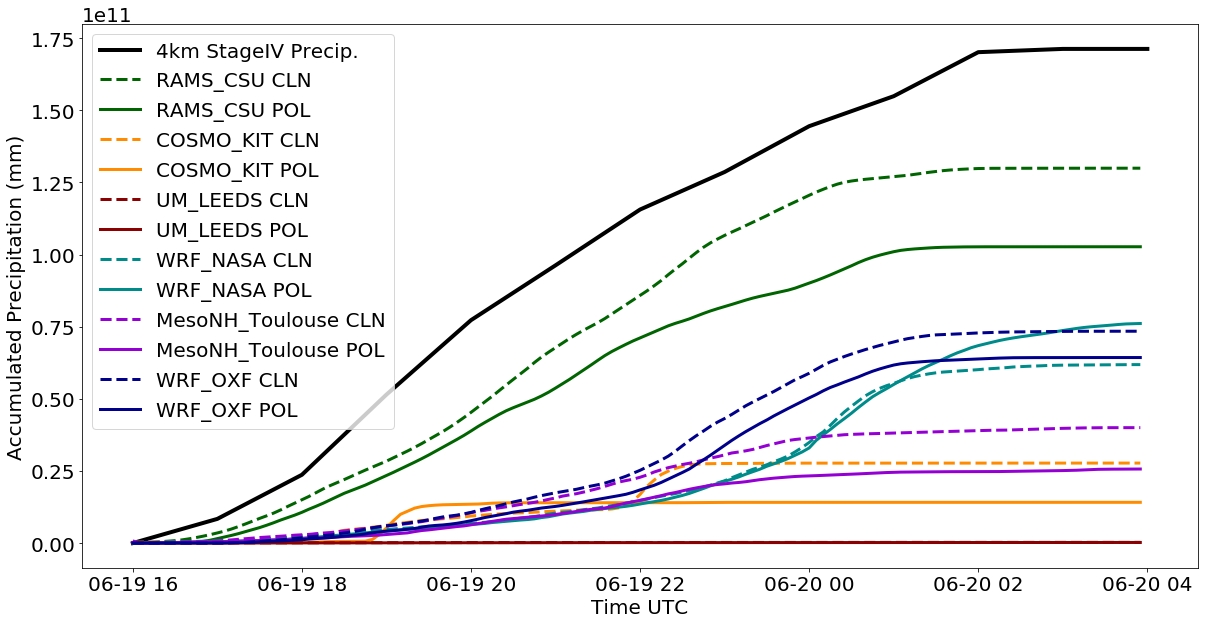

In [42]:
ls={}
ls['CLN']='--'
ls['POL']='-'

st4_factor = 4000*4000
plt.rcParams.update({"font.size":20})
fig = plt.figure(figsize=[20,10])
plt.plot(st4_dates[4:17],(precip_cum_time_st4[4:17]-precip_cum_time_st4[4])*st4_factor,'-k',lw=4,label='4km StageIV Precip.')
for model in models:
    for case in cases:    
        plt.plot(mod_dates[0:144],precip_cum_time_scr_mod_regrid[model,case][0:144]*st4_factor,
            color=color[model],
            linestyle=ls[case],
            linewidth=3,
            label=f'{model} {case}')
plt.legend()
plt.ylabel('Accumulated Precipitation (mm)')
plt.xlabel('Time UTC')
plt.savefig('Regrid_Accumulated_Precip_with_Time'+str(lat_bnd)+str(lon_bnd)+'.png')

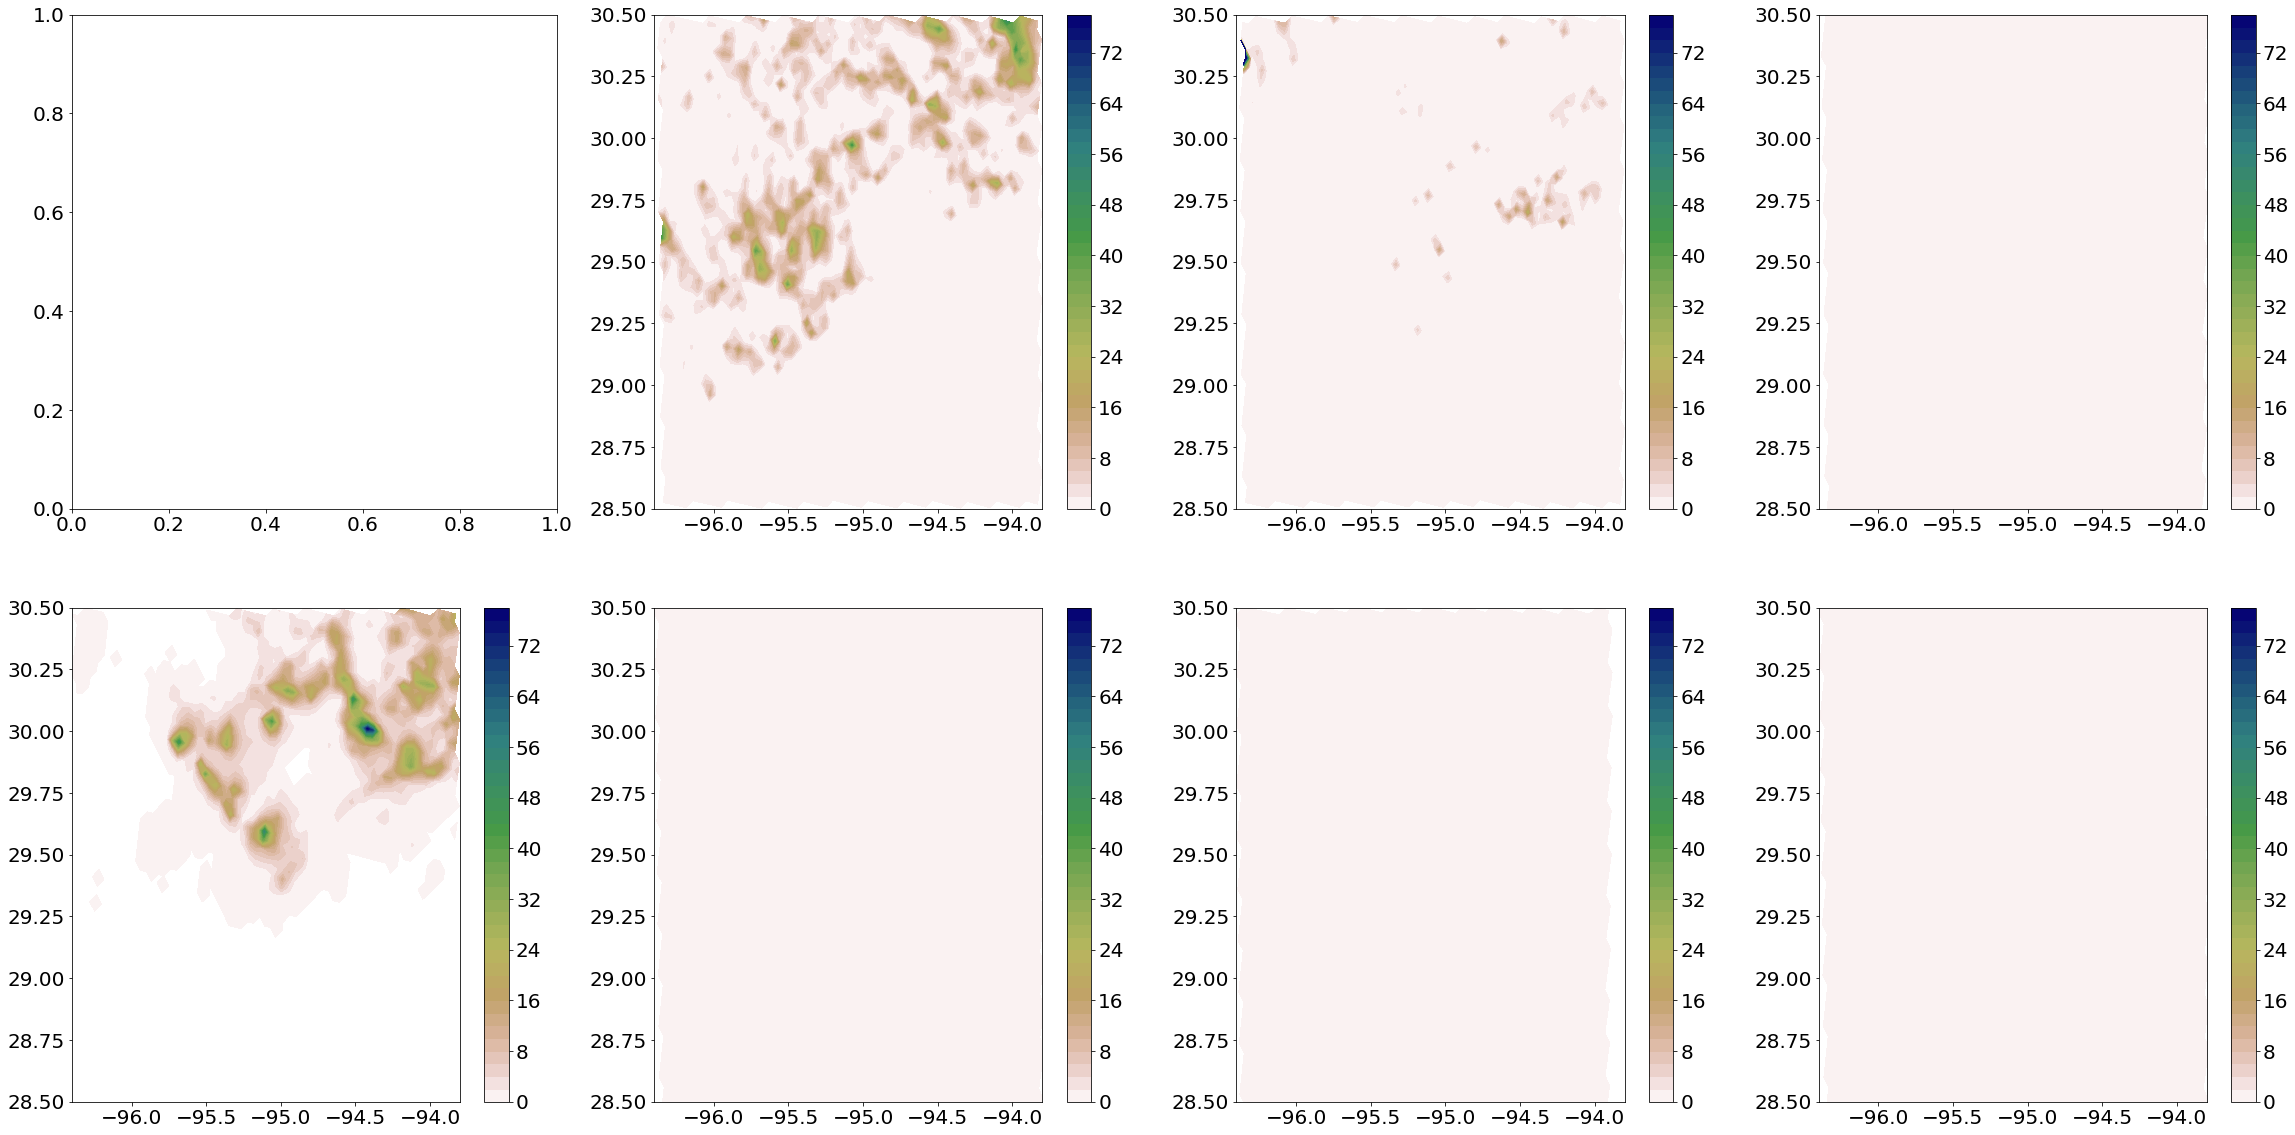

In [39]:
fig,axs = plt.subplots(2,4,figsize=(40,20))
clevs = np.arange(0,80,2);
#fig = plt.figure(figsize=[10,10])
case = 'CLN'
cntm = 0; cntc = 1
for model in models:
    a = axs[cntm,cntc].contourf(lon_st4,lat_st4,precip_cum_scr_mod_regrid[model,case][:,:,144], levels=clevs, \
                               cmap=plt.cm.gist_earth_r,vmin = 0, vmax=80)
    axs[cntm,cntc].set_xlim(lon_bnd[1],lon_bnd[0])
    axs[cntm,cntc].set_ylim(lat_bnd[0],lat_bnd[1])
    plt.colorbar(a,ax=axs[cntm,cntc])
    #plt.clim(0,80)

    cntc = cntc + 1
    if cntc == 4:
        cntc = 1; cntm = 1
    
    
a = axs[1,0].contourf(lon_st4,lat_st4,precip_cum_scr_st4[:,:,17]-precip_cum_scr_st4[:,:,4], levels=clevs, \
                     cmap=plt.cm.gist_earth_r,vmin = 0, vmax=80)
axs[1,0].set_xlim(lon_bnd[1],lon_bnd[0])
axs[1,0].set_ylim(lat_bnd[0],lat_bnd[1])
plt.colorbar(a,ax = axs[1,0])
plt.savefig('Regrid_Accumulated_Precip_Maps_'+str(lat_bnd)+str(lon_bnd)+'_'+case+'.png')